# **📃Business Case: <font color=#027AD4>EdTech</font> - Clustering**💻


<img src= "https://miro.medium.com/v2/resize:fit:1100/format:webp/1*UFlMxndt54NesbGnWZhYZw.jpeg">



## **About <font color=#027AD4>EdTech**</font>

The leading EdTech platform is an advanced tech-university offering intensive courses in computer science and data science. These programs, curated by industry leaders and subject matter experts, are designed to upskill software professionals through modern curricula and cutting-edge technologies. The platform focuses on equipping learners with the knowledge, practical exposure, and industry-ready skills required to succeed in top-tier technology companies.


## **Problem Statement👀**

You are tasked as a data scientist within the analytics vertical of this leading EdTech platform to analyze and cluster learners based on their job profiles, companies, and related features. The objective is to derive meaningful clusters that reflect shared characteristics among learners, enabling deeper insights into employment trends, company segments, and learner career progression.

## **Objective🎯**

1. Perform **Exploratory Data Analysis (EDA)** to understand the dataset and clean it for processing.
2. **Cluster learners** based on attributes like:
   - Current job profiles
   - Employment start year
   - CTC details
   - Company identifiers  
3. Generate actionable insights and recommendations by:
   - Profiling companies, positions, and salary distributions.
   - Highlighting top and bottom performers based on various metrics.
4. Utilize **manual and unsupervised clustering techniques** to create meaningful groupings and analyze their implications.

## **Concepts Used📑**
1. **Exploratory Data Analysis (EDA):**
   - Statistical summary of features
   - Handling missing values
   - Removing duplicates and cleaning text with regex

2. **Feature Engineering:**
   - Creating new features like years of experience
   - Generating flags (Designation, Class, Tier) for manual clustering

3. **Manual Clustering:**
   - Analyzing learner performance and categorizing based on:
     - Company, job position, and years of experience
     - Salary distribution and company-specific averages

4. **Unsupervised Learning:**
   - **K-means clustering**: Determining optimal clusters using the elbow method
   - **Hierarchical clustering**: Understanding hierarchical relationships within data
   - Standardizing and encoding data for clustering

5. **Insights and Recommendations:**
   - Profiling top and bottom employees and companies
   - Identifying key trends in salary distributions and positions
   - Providing strategic business recommendations for Scaler

## **Libraries📚**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px
import scipy.cluster.hierarchy as sch

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Change display setting to show all columns
pd.set_option('display.max_columns', None)

# Change display setting to show full numbers
pd.set_option('display.float_format', '{:.2f}'.format)

## **Exploring the data...🔎**

In [ ]:
# Loading the data
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Sets/scaler_kmeans.csv")

In [ ]:
data.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.00,1100000,Other,2020.00
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.00,449999,FullStack Engineer,2019.00
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.00,2000000,Backend Engineer,2020.00
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.00,700000,Backend Engineer,2019.00
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.00,1400000,FullStack Engineer,2019.00


In [ ]:
data.tail()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
205838,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.00,220000,NaN,2019.00
205839,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.00,500000,NaN,2020.00
205840,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.00,700000,NaN,2021.00
205841,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.00,5100000,NaN,2019.00
205842,206922,bgqsvz onvzrtj,0bcfc1d05f2e8dc4147743a1313aa70a119b41b30d4a1f...,2014.00,1240000,NaN,2016.00


In [ ]:
# Checking the number of rows and columns
print(f"The number of rows: {data.shape[0]:,} \nThe number of columns: {data.shape[1]}")

The number of rows: 205,843 
The number of columns: 7


In [ ]:
# Check all column names
data.columns

Index(['Unnamed: 0', 'company_hash', 'email_hash', 'orgyear', 'ctc',
       'job_position', 'ctc_updated_year'],
      dtype='object')

## **Exploratory data analysis**📈

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


**🔍OBSERVATION🔎**

1. **Data Overview**:  
   - Total entries: **2,05,843 rows**  
   - Total columns: **7**
2. **Columns Details**:  
   - `Unnamed 0`: Index of the dataset
   - `Email_hash`: Anonymised Personal Identifiable Information (PII)
   - `Company_hash`: This represents an anonymized identifier for the
     company, which is the current employer of the learner.
   - `orgyear`: Employment start date
   - `CTC`: Current CTC
   - `Job_position`: Job profile in the company
   - `CTC_updated_year`: Year in which CTC got updated (Yearly increments, Promotions)

In [ ]:
# Number of unique values in each coluumn and datatype:
print("Number of unique values in each coluumn and datatype:")
print("-" * 55)
for i, elem in (enumerate(data.columns)):
  print(f"{i+1}. {elem}: {data[elem].nunique(), data[elem].dtypes}")

Number of unique values in each coluumn and datatype:
-------------------------------------------------------
1. Unnamed: 0: (205843, dtype('int64'))
2. company_hash: (37299, dtype('O'))
3. email_hash: (153443, dtype('O'))
4. orgyear: (77, dtype('float64'))
5. ctc: (3360, dtype('int64'))
6. job_position: (1016, dtype('O'))
7. ctc_updated_year: (7, dtype('float64'))


### Check for Duplicate

In [ ]:
data[data.duplicated()]

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year


### Check for missing values

In [ ]:
# How many percentage of data is missing in each column
missing_value = pd.DataFrame({'Missing Value': data.isnull().sum(), 'Percentage': (((data.isnull().sum() / len(data))*100)).round(2)})
missing_value.sort_values(by='Percentage', ascending=False)

,Missing Value,Percentage
job_position,52564,25.54
orgyear,86,0.04
company_hash,44,0.02
Unnamed: 0,0,0.00
email_hash,0,0.00
ctc,0,0.00
ctc_updated_year,0,0.00


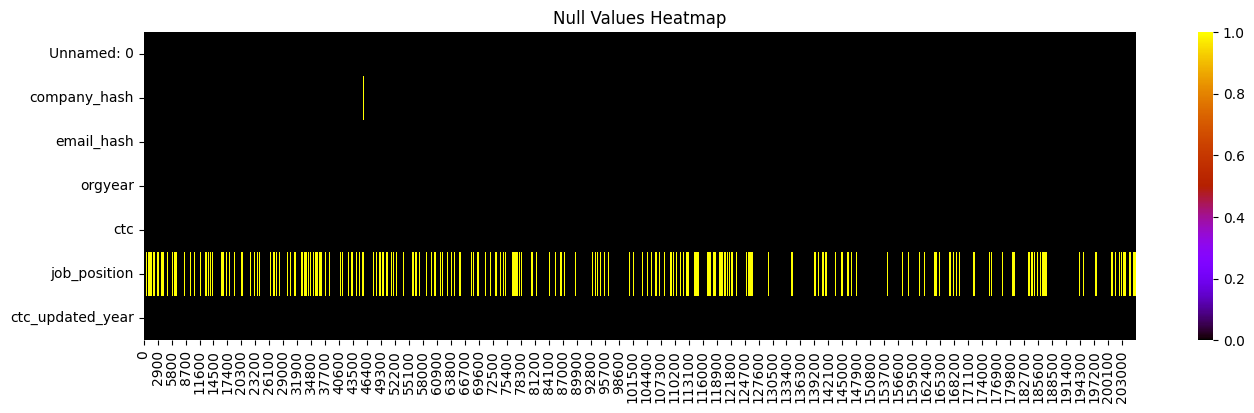

In [ ]:
# Null value heatmap:
plt.figure(figsize = (16,4))
sns.heatmap(data.isnull().T, cmap='gnuplot')
plt.title('Null Values Heatmap')
plt.show()

### Range of attributes and statistical summary

In [ ]:
# Display the range of attributes
print("Range and statistical summery of attributes:")
print("-" * 45)
data.describe(include='all').T

Range and statistical summery of attributes:
---------------------------------------------


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,205843.00,NaN,NaN,NaN,103273.94,59741.31,0.00,51518.50,103151.00,154992.50,206922.00
company_hash,205799,37299,nvnv wgzohrnvzwj otqcxwto,8337,NaN,NaN,NaN,NaN,NaN,NaN,NaN
email_hash,205843,153443,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
orgyear,205757.00,NaN,NaN,NaN,2014.88,63.57,0.00,2013.00,2016.00,2018.00,20165.00
ctc,205843.00,NaN,NaN,NaN,2271685.04,11800914.44,2.00,530000.00,950000.00,1700000.00,1000150000.00
job_position,153279,1016,Backend Engineer,43554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ctc_updated_year,205843.00,NaN,NaN,NaN,2019.63,1.33,2015.00,2019.00,2020.00,2021.00,2021.00


**🔍OBSERVATION🔎**

**1. Unnamed: 0** (Index Column):
- **Count:** 205,843 (No missing values).  
- **Range:**  
  - Minimum: 0.  
  - Maximum: 206,922.  
- **Observations:** This column is likely an auto-incremented index. It doesn’t provide meaningful insights for analysis and may be dropped.  



**2. company_hash** (Anonymized Company Identifier):
- **Count:** 205,799 (44 missing values).  
- **Unique:** 37,299 unique companies.  
- **Top:** "nvnv wgzohrnvzwj otqcxwto" (most frequent company name).  
- **Frequency:** 8,337 learners associated with the top company.  
- **Observations:**  
  - The column has high cardinality, representing a diverse set of companies.  
  - Missing values can be imputed with "Unknown" or removed, depending on their importance.  



**3. email_hash** (Anonymized Personal Identifiable Information):
- **Count:** 205,843 (No missing values).  
- **Unique:** 153,443 unique email hashes.  
- **Top:** One specific email hash appears 10 times.  
- **Observations:**  
  - Indicates learners with multiple job records or duplicate entries.  
  - Duplicates need to be examined further to identify if they represent valid data or redundancy.  



**4. orgyear** (Employment Start Year):
- **Count:** 205,757 (86 missing values).  
- **Range:**  
  - Minimum: 0 (Likely an error).  
  - Maximum: 20,165 (Likely an error).  
- **Mean:** 2014.88 (~2015).  
- **Observations:**  
  - Erroneous values (e.g., `0` and `20,165`) need to be corrected or removed.  
  - Most learners started their careers around 2015, with the central tendency (median) at 2016.  



**5. ctc** (Current Salary in INR):  
- **Count:** 205,843 (No missing values).  
- **Range:**  
  - Minimum: ₹2 (Likely an outlier or error).  
  - Maximum: ₹1,000,150,000 (~₹100 Crores, possibly an outlier).  
- **Mean:** ₹22,71,685.  
- **Median (50%):** ₹9,50,000 (indicating right-skewed distribution).  
- **Observations:**  
  - The presence of extreme values suggests the need for outlier treatment.  
  - A significant portion of learners has a salary around ₹9.5 Lakhs (median).  



**6. job_position** (Job Profile):
- **Count:** 153,279 (52,564 missing values).  
- **Unique:** 1,016 unique job positions.  
- **Top:** "Backend Engineer" (most frequent job).  
- **Frequency:** 43,554 learners are Backend Engineers.  
- **Observations:**  
  - Missing values can be filled as "Unknown" or imputed with probable job positions based on other features.  
  - High diversity in roles indicates varied career paths for learners.  



**7. ctc_updated_year** (Last Salary Update Year):
- **Count:** 205,843 (No missing values).  
- **Range:**  
  - Minimum: 2015.  
  - Maximum: 2021.  
- **Mean:** 2019.63 (~2020).  
- **Observations:**  
  - Most learners received their last salary update in recent years (2019-2021).  
  - No anomalies in the range.  



**Range Summary of Attributes**
- **Numerical Columns (Range):**
  - `orgyear`: 0 to 20,165 (erroneous extreme values).  
  - `ctc`: ₹2 to ₹1,000,150,000 (extreme outliers).  
  - `ctc_updated_year`: 2015 to 2021 (valid).  

- **Categorical Columns:**
  - `company_hash` and `job_position`: High cardinality with a few dominant values.

### Data processing

In [ ]:
# Create a deep copy
df = data.copy()

In [ ]:
# Drop the Unnamed: 0 column
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.00,1100000,Other,2020.00
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.00,449999,FullStack Engineer,2019.00
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.00,2000000,Backend Engineer,2020.00
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.00,700000,Backend Engineer,2019.00
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.00,1400000,FullStack Engineer,2019.00


#### Column - company_hash

In [ ]:
df['company_hash'].describe()

,company_hash
count,205799
unique,37299
top,nvnv wgzohrnvzwj otqcxwto
freq,8337


In [ ]:
df['company_hash'].isna().sum()

44

In [ ]:
df[df['company_hash'].isna()].head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
1115,NaN,8fe09b732fe2e5b66c14904fd02ff89fb54f458465ac1e...,2022.00,66600000,NaN,2020.00
2400,NaN,1074b55f02e6fc88596db85854e057c98cb53c038e0d7f...,2018.00,250000,Other,2019.00
3277,NaN,66263f4942b046c67ae6e2570e7825c03792631a0b13f1...,2018.00,500000,Other,2019.00
4205,NaN,6eb55d779699a2ea94f340ab7a58c8ec505e38bbb41214...,2018.00,600000,NaN,2020.00
4596,NaN,18813fe2a50a45cc02c5b3871c676bd147c80ff0327ee9...,2020.00,300000,NaN,2021.00


In [ ]:
# Remove Special Characters using Regex
import re

# Define a function to clean text columns
def clean_text(column):
    return column.apply(lambda x: re.sub(r'[^A-Za-z0-9 ]+', '', str(x)))

# Clean `company_hash` column
df['company_hash'] = clean_text(df['company_hash'])

In [ ]:
df['company_hash'].head()

,company_hash
0,atrgxnnt xzaxv
1,qtrxvzwt xzegwgbb rxbxnta
2,ojzwnvwnxw vx
3,ngpgutaxv
4,qxen sqghu


In [ ]:
df['company_hash'].isna().sum()

0

In [ ]:
df.loc[1115]

,1115
company_hash,nan
email_hash,8fe09b732fe2e5b66c14904fd02ff89fb54f458465ac1e...
orgyear,2022.00
ctc,66600000
job_position,NaN
ctc_updated_year,2020.00


**🔍OBSERVATION🔎**

- After regex application, NaN (a missing value) might be converted to the string 'nan'.
- This can cause confusion or issues in further processing.

In [ ]:
# Replace 'nan' strings with proper NaN values
df.replace('nan', np.nan, inplace=True)

# Fill NaN with a default value
df['company_hash'].fillna('Unknown', inplace=True)

In [ ]:
df.loc[1115]

,1115
company_hash,Unknown
email_hash,8fe09b732fe2e5b66c14904fd02ff89fb54f458465ac1e...
orgyear,2022.00
ctc,66600000
job_position,NaN
ctc_updated_year,2020.00


In [ ]:
df['company_hash'].isna().sum()

0

#### Column - email_hash

In [ ]:
df['email_hash'].describe()

,email_hash
count,205843
unique,153443
top,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...
freq,10


In [ ]:
df['email_hash'].isna().sum()

0

In [ ]:
df['email_hash'].value_counts()

,count
email_hash,
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b,10
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c,9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee,9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378,9
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66,8
...,...
bb2fe5e655ada7f7b7ac4a614db0b9c560e796bdfcaa4e5367e69eedfea93876,1
d6cdef97e759dbf1b7522babccbbbd5f164a75d1b4139e02c945958720f1ed79,1
700d1190c17aaa3f2dd9070e47a4c042ecd9205333545dbfaee0f85644d00306,1


**🔍OBSERVATION🔎**

There are multiple email hash that needs to be handelled.

#### Column - company_hash

In [ ]:
df['job_position'].value_counts()

,count
job_position,
Backend Engineer,43554
FullStack Engineer,24717
Other,18071
Frontend Engineer,10417
Engineering Leadership,6870
...,...
PhD. Student,1
Front-End Developer,1
ayS,1


In [ ]:
df['job_position'].isna().sum()

52564

In [ ]:
duplicate_email = df['email_hash'].value_counts().reset_index()
len(duplicate_email[duplicate_email['count'] != 1])

41216

In [ ]:
duplicate_email_company_hash = df.groupby('email_hash')['company_hash'].count().reset_index()
len(duplicate_email_company_hash[duplicate_email_company_hash['company_hash'] !=1])

41216

**🔍OBSERVATION🔎**

1. **Duplicate `email_hash` Instances**:
   - There are **41,216 duplicate entries** where a single `email_hash` appears more than once.
   - These duplicates can correspond to learners having multiple records for different roles, companies, or CTC updates.

2. **Multi-Company Records**:
   - The same `email_hash` is associated with multiple `company_hash` values. This indicates that a learner may have worked for more than one company, or there could be inconsistencies in the data.

3. **Null Values in `job_position`**:
   - The column `job_position` has missing values. These need to be imputed carefully to ensure meaningful clustering.

4. **CTC and Experience Variations**:
   - The `ctc` and `orgyear` columns likely have variations across duplicate `email_hash` entries, suggesting changes in roles, salaries, or experience over time.

▶ Impute Missing `job_position` Values:

In [ ]:
# Impute Missing job_position Values
df['job_position'] = df.groupby(['email_hash', 'company_hash'])['job_position'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'Unknown'))

In [ ]:
df['job_position'].isna().sum()

0

In [ ]:
df['job_position'].value_counts()

,count
job_position,
Backend Engineer,52877
FullStack Engineer,30702
Unknown,23481
Other,21941
Frontend Engineer,12623
...,...
SDET 3,1
senior software engineer-L2,1
Big data Developer,1


In [ ]:
df.shape

(205843, 6)

▶ Consolidate Duplicate Records:

In [ ]:
# Consolidate Duplicate Records:
df = df.groupby('email_hash').agg({
                                  'company_hash': lambda x: x.mode().iloc[0],  # Most frequent company
                                  'orgyear': 'first',
                                  'ctc': 'max',
                                  'job_position': lambda x: x.mode().iloc[0],  # Most frequent company
                                  'ctc_updated_year': 'max'
                                  }).reset_index()

In [ ]:
df.head()

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,00003288036a44374976948c327f246fdbdf0778546904...,bxwqgogen,2012.00,3500000,Backend Engineer,2019.00
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,2013.00,250000,Backend Engineer,2020.00
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,gunhb,2021.00,1300000,FullStack Engineer,2019.00
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,bxwqgotbx wgqugqvnxgz,2004.00,2000000,FullStack Engineer,2021.00
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,fvrbvqn rvmo,2009.00,3400000,Unknown,2018.00


In [ ]:
df.shape

(153443, 6)

In [ ]:
df.isna().sum()

,0
email_hash,0
company_hash,0
orgyear,78
ctc,0
job_position,0
ctc_updated_year,0


#### Column - orgyear

In [ ]:
df['orgyear'].describe()

,orgyear
count,153365.00
mean,2014.54
std,73.07
min,0.00
25%,2013.00
50%,2016.00
75%,2018.00
max,20165.00


In [ ]:
# Check updated missing values
df['orgyear'].isna().sum()

78

In [ ]:
df[(df['orgyear'] <= 1800)]['orgyear'].unique()

array([  1.,   0.,  91.,   5.,   3.,   2., 209., 208.,   6., 206.,   4.,
        38., 201., 200.,  83.])

In [ ]:
df[(df['orgyear'] > 2024)]['orgyear'].unique()

array([ 2025.,  2026.,  2106.,  2031., 20165.,  2204.,  2029.,  2107.,
        2028.,  2027.,  2101.])

**🔍OBSERVATION🔎**
- These values are meaning less in orgyear

In [ ]:
len(df[(df['orgyear'] <= 1800) | (df['orgyear'] > 2024)]['orgyear'])

73

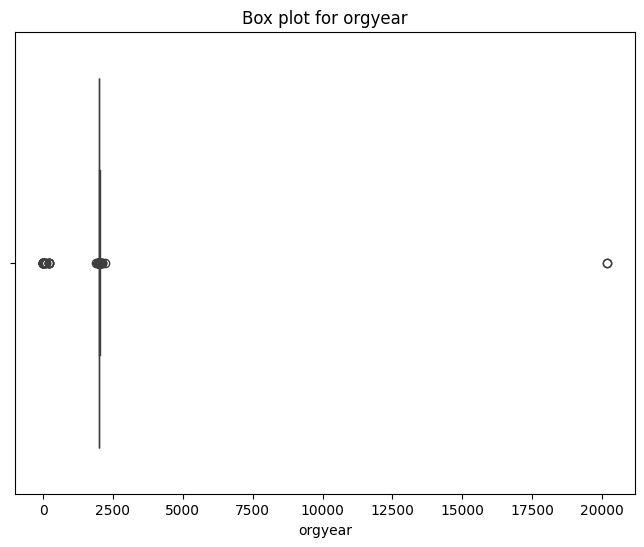

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='orgyear')
plt.title("Box plot for orgyear")
plt.show()

In [ ]:
# Replace invalid years with NaN
df.loc[(df['orgyear'] < 1800) | (df['orgyear'] > 2024), 'orgyear'] = np.nan

In [ ]:
df['orgyear'].isna().sum()

151

In [ ]:
df['orgyear'].describe()

,orgyear
count,153292.00
mean,2014.81
std,4.38
min,1900.00
25%,2013.00
50%,2016.00
75%,2018.00
max,2024.00


In [ ]:
# Fill missing values with the median
orgyear_median = df['orgyear'].median()
df['orgyear'].fillna(orgyear_median, inplace=True)

In [ ]:
df['orgyear'].isna().sum()

0

In [ ]:
df['orgyear'].describe()

,orgyear
count,153443.00
mean,2014.81
std,4.37
min,1900.00
25%,2013.00
50%,2016.00
75%,2018.00
max,2024.00


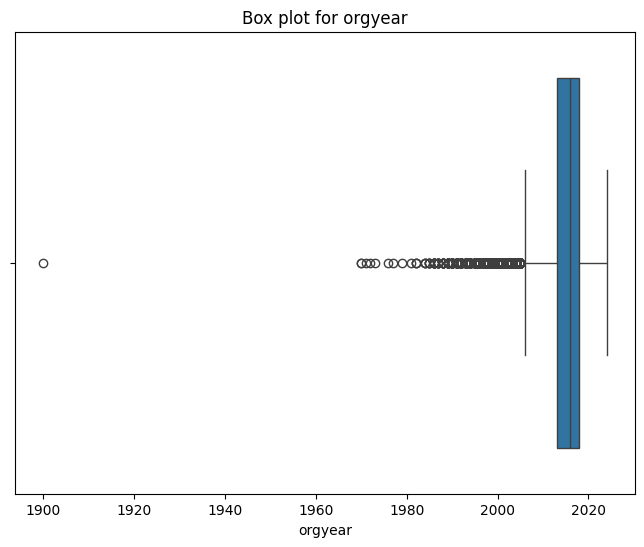

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='orgyear')
plt.title("Box plot for orgyear")
plt.show()

In [ ]:
df[df['orgyear'] == 1900]

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year
36977,3da3c964efe7a5db0f63e91be25391dcaadf24d44cdc59...,ovst xznvwwn ogenfvqt ucn rna,1900.00,3170000,Engineering Leadership,2019.00


**🔍OBSERVATION🔎**

There is only one record with orgyear = 1900. So lets handle while treating outliers.

In [ ]:
df.isna().sum()

,0
email_hash,0
company_hash,0
orgyear,0
ctc,0
job_position,0
ctc_updated_year,0


#### Changing the Datatype

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153443 entries, 0 to 153442
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   email_hash        153443 non-null  object 
 1   company_hash      153443 non-null  object 
 2   orgyear           153443 non-null  float64
 3   ctc               153443 non-null  int64  
 4   job_position      153443 non-null  object 
 5   ctc_updated_year  153443 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 7.0+ MB


In [ ]:
df['orgyear'] = df['orgyear'].astype('int')
df['ctc_updated_year'] = df['ctc_updated_year'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153443 entries, 0 to 153442
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   email_hash        153443 non-null  object
 1   company_hash      153443 non-null  object
 2   orgyear           153443 non-null  int64 
 3   ctc               153443 non-null  int64 
 4   job_position      153443 non-null  object
 5   ctc_updated_year  153443 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 7.0+ MB


#### Outlier Treatment

##### Column - orgyear

In [ ]:
print(df['orgyear'].describe())
print()
print(f"Skewness coefficient: {df['orgyear'].skew().round(2)}")

count   153443.00
mean      2014.81
std          4.37
min       1900.00
25%       2013.00
50%       2016.00
75%       2018.00
max       2024.00
Name: orgyear, dtype: float64

Skewness coefficient: -1.58


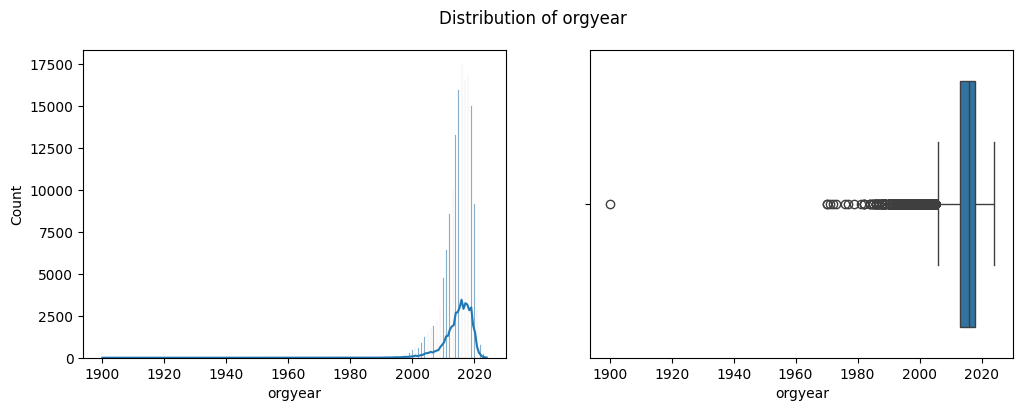

In [ ]:
# Distribution of orgyear
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(data=df, x='orgyear', kde=True)

plt.subplot(1,2,2)
sns.boxplot(data=df, x='orgyear')

plt.suptitle("Distribution of orgyear")
plt.show()

▶ Percentile Capping

In this case, **percentile capping** (e.g., capping at the 1st and 99th percentiles) is likely better because:

1. There are historical years (`1900`) that may not align with real-world joining years, which percentile capping can address effectively.
2. The max value (`2024`) is logical, but extreme old values (`1900`) should be capped, and percentiles give you flexibility to retain realistic outliers.

In [ ]:
# Define the lower percentile (e.g., 1st percentile)
lower_percentile = df['orgyear'].quantile(0.01)
upper_percentile = df['orgyear'].quantile(0.99)

# Cap only the lower outliers
df['orgyear'] = df['orgyear'].clip(lower=lower_percentile, upper=upper_percentile)

In [ ]:
print(df['orgyear'].describe())
print()
print(f"Skewness coefficient: {df['orgyear'].skew().round(2)}")

count   153443.00
mean      2014.84
std          4.20
min       2000.00
25%       2013.00
50%       2016.00
75%       2018.00
max       2021.00
Name: orgyear, dtype: float64

Skewness coefficient: -1.2


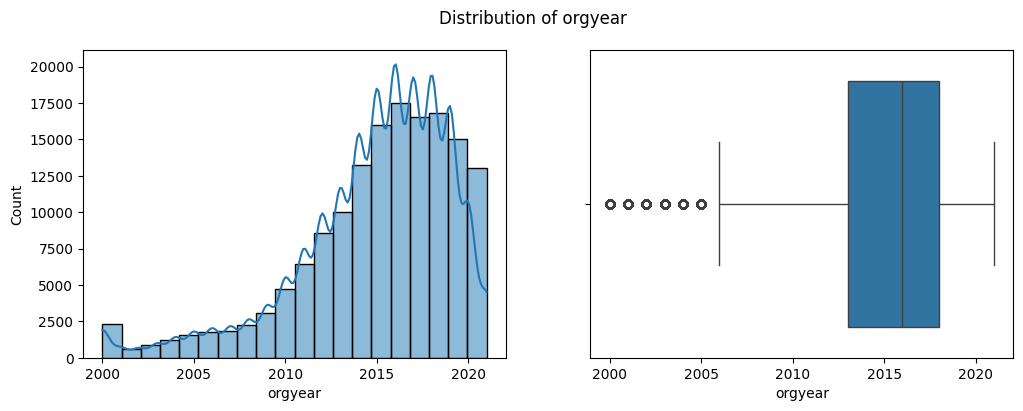

In [ ]:
# Distribution of orgyear
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(data=df, x='orgyear', kde=True, bins=20)

plt.subplot(1,2,2)
sns.boxplot(data=df, x='orgyear')

plt.suptitle("Distribution of orgyear")
plt.show()

##### Column - ctc

In [ ]:
print(df['ctc'].describe())
print()
print(f"Skewness coefficient: {df['ctc'].skew().round(2)}")

count       153443.00
mean       2552687.81
std       13193009.34
min              2.00
25%         550000.00
50%        1000000.00
75%        1739999.00
max     1000150000.00
Name: ctc, dtype: float64

Skewness coefficient: 14.41


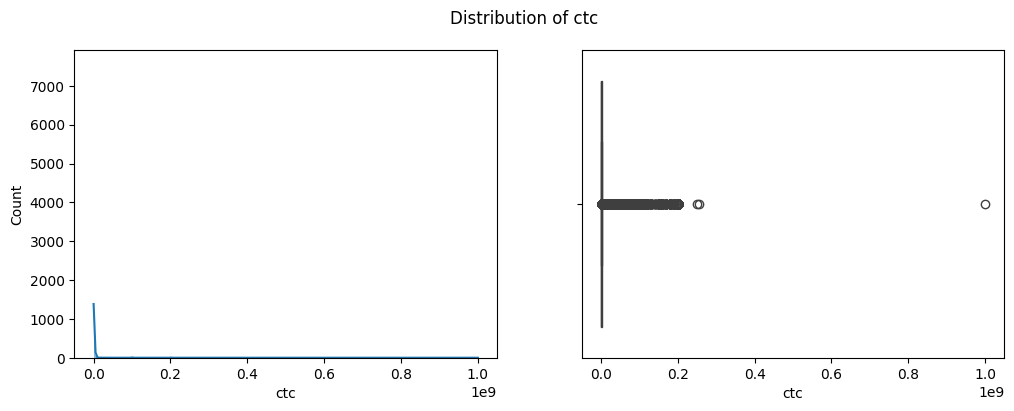

In [ ]:
# Distribution of ctc
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(data=df, x='ctc', kde=True)

plt.subplot(1,2,2)
sns.boxplot(data=df, x='ctc')

plt.suptitle("Distribution of ctc")
plt.show()

▶ Percentile Capping

In this case, **percentile capping** (e.g., capping at the 1st and 99th percentiles) is likely better because:

- Suitable for highly skewed data with extreme outliers.
- It preserves most of the data while handling extreme values.
- Ideal for further clustering or analysis requiring reasonable value ranges.



In [ ]:
# Calculate percentile bounds
lower_percentile = df['ctc'].quantile(0.01)
upper_percentile = df['ctc'].quantile(0.99)

# Apply percentile capping
df['ctc'] = df['ctc'].clip(lower=lower_percentile, upper=upper_percentile)

In [ ]:
print(df['ctc'].describe())
print()
print(f"Skewness coefficient: {df['ctc'].skew().round(2)}")

count     153443.00
mean     1647064.99
std      3079682.32
min        40000.00
25%       550000.00
50%      1000000.00
75%      1739999.00
max     28348000.00
Name: ctc, dtype: float64

Skewness coefficient: 7.08


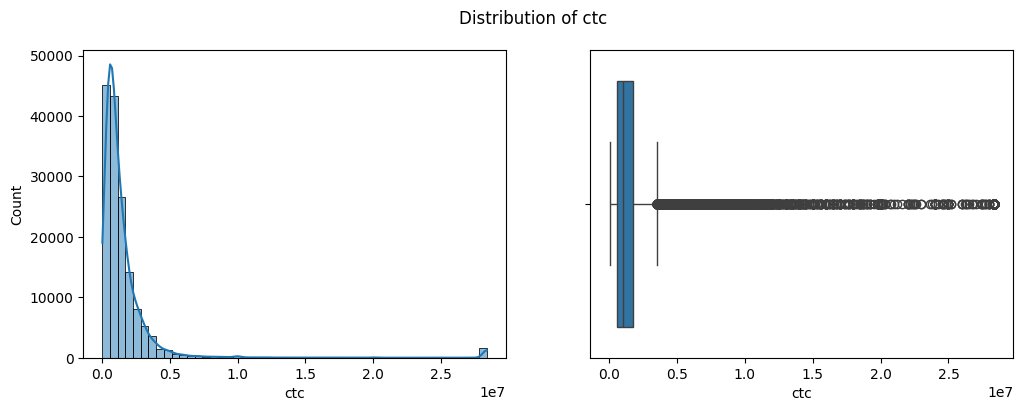

In [ ]:
# Distribution of ctc
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(data=df, x='ctc', kde=True, bins=50)

plt.subplot(1,2,2)
sns.boxplot(data=df, x='ctc')

plt.suptitle("Distribution of ctc")
plt.show()

▶ Log Transformation for ctc

-  Log transformation can reduce the skewness and bring the data closer to a normal distribution.
- Best when analysis requires a normalized distribution.

###### Log Transformation

In [ ]:
# Apply log transformation (add 1 to avoid log(0))
df['log_ctc'] = np.log1p(df['ctc'])

In [ ]:
print(df['log_ctc'].describe())
print()
print(f"Skewness coefficient: {df['log_ctc'].skew().round(2)}")

count   153443.00
mean        13.78
std          0.99
min         10.60
25%         13.22
50%         13.82
75%         14.37
max         17.16
Name: log_ctc, dtype: float64

Skewness coefficient: -0.13


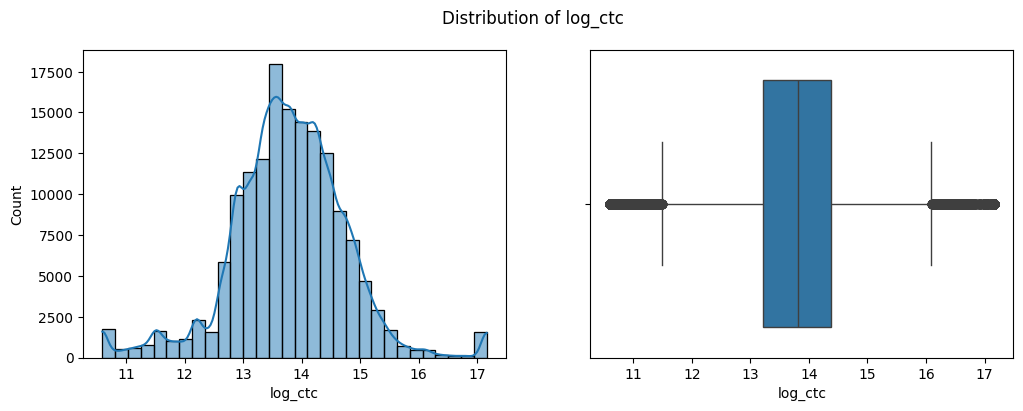

In [ ]:
# Distribution of ctc
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(data=df, x='log_ctc', kde=True, bins=30)

plt.subplot(1,2,2)
sns.boxplot(data=df, x='log_ctc')

plt.suptitle("Distribution of log_ctc")
plt.show()

**🔍OBSERVATION🔎**

1. **Reduced Skewness**:  
   - The skewness coefficient has significantly improved, dropping from **14.41** (highly skewed) to **-0.13**, indicating a near-symmetric distribution.

2.  Use **`log_ctc`** for:
  - Clustering tasks.
  - Statistical analysis.
  - Linear models or distance-based machine learning.

3. Use **original `ctc`** for:
  - Creating business flags and tiers.
  - Reporting and interpretive insights for stakeholders.

##### Column - ctc_updated_year

In [ ]:
print(df['ctc_updated_year'].describe())
print()
print(f"Skewness coefficient: {df['ctc_updated_year'].skew().round(2)}")

count   153443.00
mean      2019.49
std          1.37
min       2015.00
25%       2019.00
50%       2020.00
75%       2021.00
max       2021.00
Name: ctc_updated_year, dtype: float64

Skewness coefficient: -1.09


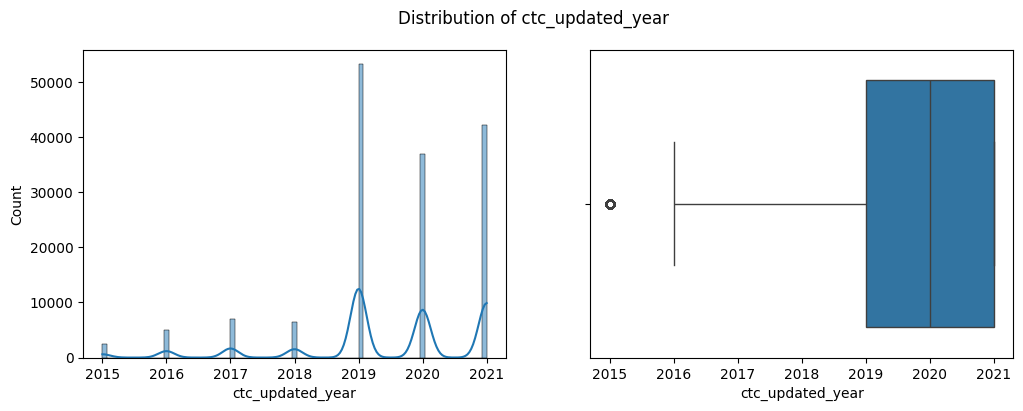

In [ ]:
# Distribution of ctc_updated_year
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(data=df, x='ctc_updated_year', kde=True)

plt.subplot(1,2,2)
sns.boxplot(data=df, x='ctc_updated_year')

plt.suptitle("Distribution of ctc_updated_year")
plt.show()

**🔍OBSERVATION🔎**

- The values in ctc_updated_year range from 2015 to 2021, which aligns with logical expectations for the column.
- The skewness coefficient is -1.09, indicating a mild negative skew (values are slightly more concentrated toward the upper end, i.e., recent years).
- However, this level of skewness is not extreme and does not necessitate transformations or capping.



#### Feature Engineering

In [ ]:
# Create experience_years
current_year = 2024
df['experience_years'] = current_year - df['orgyear']

In [ ]:
df.head()

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,log_ctc,experience_years
0,00003288036a44374976948c327f246fdbdf0778546904...,bxwqgogen,2012,3500000.00,Backend Engineer,2019,15.07,12
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,2013,250000.00,Backend Engineer,2020,12.43,11
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,gunhb,2021,1300000.00,FullStack Engineer,2019,14.08,3
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,bxwqgotbx wgqugqvnxgz,2004,2000000.00,FullStack Engineer,2021,14.51,20
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,fvrbvqn rvmo,2009,3400000.00,Unknown,2018,15.04,15


In [ ]:
print(df['experience_years'].describe())
print()
print(f"Skewness coefficient: {df['experience_years'].skew().round(2)}")

count   153443.00
mean         9.16
std          4.20
min          3.00
25%          6.00
50%          8.00
75%         11.00
max         24.00
Name: experience_years, dtype: float64

Skewness coefficient: 1.2


**🔍OBSERVATION🔎**
- The year of experiance ranges from 3 years 24 years with the mean of around 9 years and the median of 8 years.

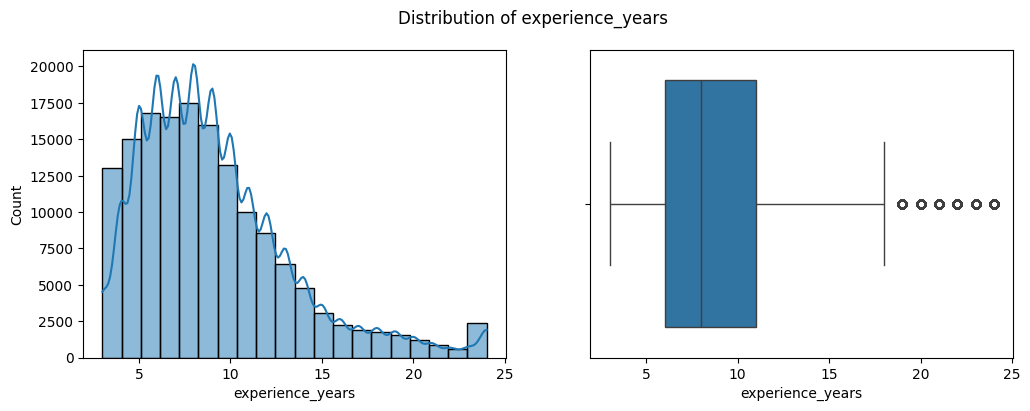

In [ ]:
# Distribution of ctc_updated_year
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(data=df, x='experience_years', kde=True, bins=20)

plt.subplot(1,2,2)
sns.boxplot(data=df, x='experience_years')

plt.suptitle("Distribution of experience_years")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153443 entries, 0 to 153442
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   email_hash        153443 non-null  object 
 1   company_hash      153443 non-null  object 
 2   orgyear           153443 non-null  int64  
 3   ctc               153443 non-null  float64
 4   job_position      153443 non-null  object 
 5   ctc_updated_year  153443 non-null  int64  
 6   log_ctc           153443 non-null  float64
 7   experience_years  153443 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 9.4+ MB


In [ ]:
# Number of unique values in each coluumn and datatype:
print("Number of unique values in each coluumn and datatype:")
print("-" * 55)
for i, elem in (enumerate(df.columns)):
  print(f"{i+1}. {elem}: {df[elem].nunique(), df[elem].dtypes}")

Number of unique values in each coluumn and datatype:
-------------------------------------------------------
1. email_hash: (153443, dtype('O'))
2. company_hash: (36383, dtype('O'))
3. orgyear: (22, dtype('int64'))
4. ctc: (2735, dtype('float64'))
5. job_position: (727, dtype('O'))
6. ctc_updated_year: (7, dtype('int64'))
7. log_ctc: (2735, dtype('float64'))
8. experience_years: (22, dtype('int64'))


In [ ]:
# Value counts for Categorical features
categorical_cols = ['company_hash', 'job_position']

for col in categorical_cols:
    top_categories = df[col].value_counts().head(10)
    print(top_categories)
    print()

company_hash
nvnv wgzohrnvzwj otqcxwto    5332
xzegojo                      3458
vbvkgz                       2458
wgszxkvzn                    2185
zgn vuurxwvmrt vwwghzn       2165
vwwtznhqt                    1966
gqvwrt                       1766
fxuqg rxbxnta                1753
bxwqgogen                    1570
wvustbxzx                    1348
Name: count, dtype: int64

job_position
Backend Engineer          40011
Unknown                   20241
FullStack Engineer        18986
Other                     14806
Frontend Engineer          9401
Engineering Leadership     6155
QA Engineer                6113
Android Engineer           5103
Data Scientist             4916
Devops Engineer            4334
Name: count, dtype: int64



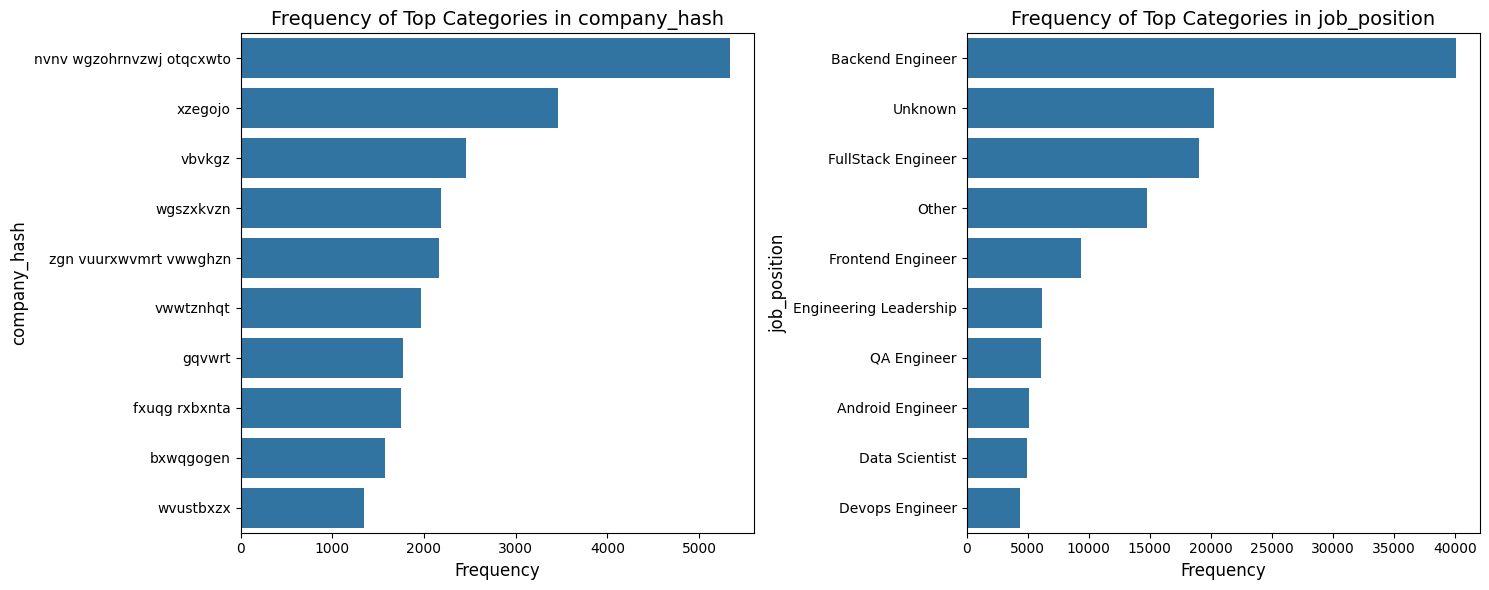

In [ ]:
# Univariate Analysis for Categorical Attributes
categorical_cols = ['company_hash', 'job_position']

plt.figure(figsize=(15,6))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    top_categories = df[col].value_counts().head(10)  # Displaying top 10 categories
    sns.barplot(x=top_categories.values, y=top_categories.index) # , palette='viridis'
    plt.title(f"Frequency of Top Categories in {col}", fontsize=14)
    plt.xlabel("Frequency", fontsize=12)
    plt.ylabel(col, fontsize=12)

plt.tight_layout()
plt.show()

**🔍OBSERVATION🔎**

**1. `company_hash` Analysis**
- The top 10 companies account for a significant proportion of the dataset, indicating that certain companies dominate in terms of representation.
- **Most frequent company**: `"nvnv wgzohrnvzwj otqcxwto"` with 5,332 records.
- The frequency drops substantially after the top companies, which shows the presence of a long-tail distribution of smaller companies.

**2. `job_position` Analysis**
- The most frequent job position is **"Backend Engineer"** (40,011 records), accounting for a significant portion of the dataset.
- **Unknown** entries for job positions rank second (20,241 records), showing a gap in data collection or classification.
- **Other** job positions also have high representation, implying roles outside predefined categories.
- Technical roles like **FullStack Engineer**, **Frontend Engineer**, and **Data Scientist** dominate, reflecting the tech-centric nature of the dataset.





---


## **Clustering ❄**

### Manual Clustering

#### Get 5-Point Summary of CTC

In [ ]:
# 5-point summary
ctc_summary = df.groupby(['company_hash', 'job_position', 'experience_years'])['ctc'].agg(
                                                                                          ['mean', 'median', 'max', 'min', 'count']
                                                                                          ).reset_index()

In [ ]:
ctc_summary.head()

,company_hash,job_position,experience_years,mean,median,max,min,count
0,0,Other,4,100000.00,100000.00,100000.00,100000.00,1
1,0000,Other,7,300000.00,300000.00,300000.00,300000.00,1
2,01 ojztqsj,Android Engineer,8,270000.00,270000.00,270000.00,270000.00,1
3,01 ojztqsj,Frontend Engineer,13,830000.00,830000.00,830000.00,830000.00,1
4,05mz exzytvrny uqxcvnt rxbxnta,Backend Engineer,5,1100000.00,1100000.00,1100000.00,1100000.00,1


#### Merge Summary Back to the Original Dataset

In [ ]:
# Merge CTC summary back to the main dataset
df = df.merge(ctc_summary, on=['company_hash', 'job_position', 'experience_years'], suffixes=('', '_summary'))
# Rename for the columns for clarity
df.rename(columns={'mean': 'avg_ctc', 'median': 'median_ctc'}, inplace=True)

In [ ]:
df.head()

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,log_ctc,experience_years,avg_ctc,median_ctc,max,min,count
0,00003288036a44374976948c327f246fdbdf0778546904...,bxwqgogen,2012,3500000.00,Backend Engineer,2019,15.07,12,3185698.28,2800000.00,16800000.00,53000.00,58
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,2013,250000.00,Backend Engineer,2020,12.43,11,250000.00,250000.00,250000.00,250000.00,1
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,gunhb,2021,1300000.00,FullStack Engineer,2019,14.08,3,1228200.00,1300000.00,1600000.00,710000.00,5
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,bxwqgotbx wgqugqvnxgz,2004,2000000.00,FullStack Engineer,2021,14.51,20,2000000.00,2000000.00,2000000.00,2000000.00,1
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,fvrbvqn rvmo,2009,3400000.00,Unknown,2018,15.04,15,3766666.67,3900000.00,4000000.00,3400000.00,3


#### Create Flags Based on CTC Comparisons

In [ ]:
def assign_designation(ctc, avg_ctc):
    if ctc > avg_ctc:
        return 1  # Above average
    elif ctc == avg_ctc:
        return 2  # At average
    else:
        return 3  # Below average

##### ▶ **Flag 1: `designation`**

Indicates whether the learner's CTC is above the average CTC of their company’s department (same `job_position` and `experience_years`).

In [ ]:
df['designation'] = df.apply(lambda x: assign_designation(x['ctc'], x['avg_ctc']), axis=1)

In [ ]:
df.head()

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,log_ctc,experience_years,avg_ctc,median_ctc,max,min,count,designation
0,00003288036a44374976948c327f246fdbdf0778546904...,bxwqgogen,2012,3500000.00,Backend Engineer,2019,15.07,12,3185698.28,2800000.00,16800000.00,53000.00,58,1
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,2013,250000.00,Backend Engineer,2020,12.43,11,250000.00,250000.00,250000.00,250000.00,1,2
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,gunhb,2021,1300000.00,FullStack Engineer,2019,14.08,3,1228200.00,1300000.00,1600000.00,710000.00,5,1
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,bxwqgotbx wgqugqvnxgz,2004,2000000.00,FullStack Engineer,2021,14.51,20,2000000.00,2000000.00,2000000.00,2000000.00,1,2
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,fvrbvqn rvmo,2009,3400000.00,Unknown,2018,15.04,15,3766666.67,3900000.00,4000000.00,3400000.00,3,3


##### ▶ **Flag 2: `class`**

Determines relative performance at the **Company + Job Position level**.


In [ ]:
class_summary = df.groupby(['company_hash', 'job_position'])['ctc'].mean().reset_index()
class_summary.rename(columns={'ctc': 'avg_ctc_class'}, inplace=True)

df = df.merge(class_summary, on=['company_hash', 'job_position'], how='left')

df['class'] = df.apply(lambda x: assign_designation(x['ctc'], x['avg_ctc_class']), axis=1)

In [ ]:
df.head()

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,log_ctc,experience_years,avg_ctc,median_ctc,max,min,count,designation,avg_ctc_class,class
0,00003288036a44374976948c327f246fdbdf0778546904...,bxwqgogen,2012,3500000.00,Backend Engineer,2019,15.07,12,3185698.28,2800000.00,16800000.00,53000.00,58,1,3021183.19,1
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,2013,250000.00,Backend Engineer,2020,12.43,11,250000.00,250000.00,250000.00,250000.00,1,2,250000.00,2
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,gunhb,2021,1300000.00,FullStack Engineer,2019,14.08,3,1228200.00,1300000.00,1600000.00,710000.00,5,1,1312282.05,3
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,bxwqgotbx wgqugqvnxgz,2004,2000000.00,FullStack Engineer,2021,14.51,20,2000000.00,2000000.00,2000000.00,2000000.00,1,2,1067500.00,1
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,fvrbvqn rvmo,2009,3400000.00,Unknown,2018,15.04,15,3766666.67,3900000.00,4000000.00,3400000.00,3,3,2660123.29,1


##### ▶ **Flag 3: `tier`**

Determines relative performance at the **Company level**.

In [ ]:
tier_summary = df.groupby('company_hash')['ctc'].mean().reset_index()
tier_summary.rename(columns={'ctc': 'avg_ctc_tier'}, inplace=True)

df = df.merge(tier_summary, on='company_hash', how='left')

df['tier'] = df.apply(lambda x: assign_designation(x['ctc'], x['avg_ctc_tier']), axis=1)

In [ ]:
df.head()

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,log_ctc,experience_years,avg_ctc,median_ctc,max,min,count,designation,avg_ctc_class,class,avg_ctc_tier,tier
0,00003288036a44374976948c327f246fdbdf0778546904...,bxwqgogen,2012,3500000.00,Backend Engineer,2019,15.07,12,3185698.28,2800000.00,16800000.00,53000.00,58,1,3021183.19,1,3026587.39,1
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,2013,250000.00,Backend Engineer,2020,12.43,11,250000.00,250000.00,250000.00,250000.00,1,2,250000.00,2,250000.00,2
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,gunhb,2021,1300000.00,FullStack Engineer,2019,14.08,3,1228200.00,1300000.00,1600000.00,710000.00,5,1,1312282.05,3,1477227.53,3
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,bxwqgotbx wgqugqvnxgz,2004,2000000.00,FullStack Engineer,2021,14.51,20,2000000.00,2000000.00,2000000.00,2000000.00,1,2,1067500.00,1,1731363.64,1
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,fvrbvqn rvmo,2009,3400000.00,Unknown,2018,15.04,15,3766666.67,3900000.00,4000000.00,3400000.00,3,3,2660123.29,1,2834789.20,1


#### Q) Top 10 Employees in Tier 1

In [ ]:
top_10_tier1 = df[df['tier'] == 1].nlargest(10, 'ctc')
top_10_tier1

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,log_ctc,experience_years,avg_ctc,median_ctc,max,min,count,designation,avg_ctc_class,class,avg_ctc_tier,tier
30,000e86d3106343631616d7f43467464134f14f7d11dad9...,tlvav,2012,28348000.00,Data Scientist,2020,17.16,12,28348000.00,28348000.00,28348000.00,28348000.00,1,2,28348000.00,2,2065026.67,1
416,00ba199da2b78fc3105ccb7f105d1c67bfe3038cf714ed...,bve,2014,28348000.00,Devops Engineer,2020,17.16,10,28348000.00,28348000.00,28348000.00,28348000.00,1,2,28348000.00,2,14979000.00,1
545,00eebd69d81c0bb5d4ad91392d7b994395333d98cae7f0...,wgszxkvzn,2013,28348000.00,Backend Engineer,2020,17.16,11,2566225.71,850000.00,28348000.00,40000.00,31,1,1342968.80,1,1090758.83,1
676,012c5e9ac559c733509bbb9cd3e9d04f8883f4b0f4c623...,xb v onhatzn,2021,28348000.00,FullStack Engineer,2019,17.16,3,2449037.04,1200000.00,28348000.00,120000.00,27,1,2550285.71,1,1795601.67,1
721,0140d3d2e2a0b7a691888afdf97058a1f926da662bb7d6...,ontrrho,2020,28348000.00,Backend Engineer,2020,17.16,4,28348000.00,28348000.00,28348000.00,28348000.00,1,2,14306500.00,1,14306500.00,1
1084,01de51f4ed8b0e763d53ea985ab4c8eb396916841c12c0...,ywr ntwyzgrgsxto,2019,28348000.00,Unknown,2021,17.16,5,3952250.00,510000.00,28348000.00,200000.00,8,1,1645989.46,1,1168108.91,1
1332,02415645ed97708c6e191a86f6cc4cae8e23204b7b928c...,ntpojontbo,2004,28348000.00,Backend Architect,2019,17.16,20,28348000.00,28348000.00,28348000.00,28348000.00,1,2,14774000.00,1,1591775.50,1
1393,025a301811436278cad664d93c85c067187e30021d2775...,zgn vuurxwvmrt vwwghzn,2021,28348000.00,FullStack Engineer,2021,17.16,3,1901245.28,600000.00,28348000.00,40000.00,53,1,1481904.76,1,1508286.46,1
1427,026a9d366db288e28cac55d3813d4e1cb666c91720a39f...,otre tburgjta,2012,28348000.00,Business Man,2021,17.16,12,28348000.00,28348000.00,28348000.00,28348000.00,1,2,28348000.00,2,2726169.58,1
1605,02aca345d702964bf336d0e6b94fe438c17212240a4589...,zgn vuurxwvmrt,2020,28348000.00,Unknown,2019,17.16,4,1983768.78,840000.00,28348000.00,40000.00,173,1,2646301.03,1,2598040.97,1


**🔍OBSERVATION🔎**

- **Observation:**
The top 10 employees identified in Tier 1 are those with significantly higher CTC than their company’s average. These employees likely hold critical roles or bring exceptional value to their organizations.

- **Business Insight:**
High-performing employees should be incentivized with retention strategies (bonuses, stock options) to maintain their productivity and loyalty, as losing them could impact the company’s performance.

#### Q) Top 10 Employees in Class 1 (Data Science)

In [ ]:
top_10_class1_ds = df[(df['class'] == 1) & (df['job_position'] == 'Data Scientist')].nlargest(10, 'ctc')
top_10_class1_ds

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,log_ctc,experience_years,avg_ctc,median_ctc,max,min,count,designation,avg_ctc_class,class,avg_ctc_tier,tier
13254,15adaeb2eef9c0ee8a0f18e189bf426be390f5d1e911fd...,zvsvqqg,2021,28348000.00,Data Scientist,2021,17.16,3,28348000.00,28348000.00,28348000.00,28348000.00,1,2,2711277.72,1,1291362.06,1
23232,268a5aa92f0b6d0c675fc9cc1e300eb0c5930a3a139a23...,zgzt,2021,28348000.00,Data Scientist,2020,17.16,3,8217000.00,2210000.00,28348000.00,100000.00,4,1,2607000.00,1,2243795.90,1
26470,2bede29959707d8c6f283d98319361c386baa6fa5c8028...,bgqsvz onvzrtj,2021,28348000.00,Data Scientist,2020,17.16,3,28348000.00,28348000.00,28348000.00,28348000.00,1,2,11296000.00,1,2367502.36,1
63975,6ad86d120e39db485331f9a0b2b1f15ce2a7bdaee778ab...,ntwy bvyxzaqv,2021,28348000.00,Data Scientist,2019,17.16,3,28348000.00,28348000.00,28348000.00,28348000.00,1,2,2630562.50,1,1456594.69,1
64360,6b6dd66bae787dd4dd417e1777f8ea5a057257e9019995...,xzzgcv ogrhnxgzo,2016,28348000.00,Data Scientist,2020,17.16,8,14574000.00,14574000.00,28348000.00,800000.00,2,1,14574000.00,1,3784800.00,1
113341,bd222ea783ee372da4e0ad60fdccec0b8f37999a032025...,ihvaqvnxw xzoxsyno ucn rna,2015,28348000.00,Data Scientist,2019,17.16,9,28348000.00,28348000.00,28348000.00,28348000.00,1,2,10219333.33,1,5474666.50,1
114161,be8afd4a4e5cedb6bfbabbc88f15e756d69c3f2491d02a...,eqtoytq,2021,28348000.00,Data Scientist,2020,17.16,3,14224000.00,14224000.00,28348000.00,100000.00,2,1,2744000.00,1,1338142.99,1
123169,cda8d723438e81185d2ee8c348870a4612eea974cdb2db...,mqxonrtwgzt v bvyxzaqv sqghu wgbuvzj,2017,28348000.00,Data Scientist,2020,17.16,7,28348000.00,28348000.00,28348000.00,28348000.00,1,2,6803600.00,1,1803499.97,1
148556,f7b7c771ccdbbca7248002ba83f7a176baa974c2c7bb8f...,wxnx,2011,24200000.00,Data Scientist,2020,17.00,13,24200000.00,24200000.00,24200000.00,24200000.00,1,2,3491333.33,1,2138163.49,1
53629,599e489c815ba51967965c5d6adefd7a76a99ffaa129bd...,bxwqgogen,2002,22500000.00,Data Scientist,2019,16.93,22,22500000.00,22500000.00,22500000.00,22500000.00,1,2,3175763.16,1,3026587.39,1


**🔍OBSERVATION🔎**

- **Observation:**
Data Science professionals in Class 1 are earning above the average CTC of their peers within the same job position and company. This indicates a high demand for their skills or a recognition of their contributions.

- **Business Insight:**
Companies valuing Data Science roles indicate a focus on data-driven decision-making. This insight can help in targeting these organizations for upskilling programs or offering specialized training for other employees in similar domains.

#### Q) Bottom 10 Employees in Class 3 (Data Science)

In [ ]:
bottom_10_class3_ds = df[(df['class'] == 3) & (df['job_position'] == 'Data Scientist')].nsmallest(10, 'ctc')
bottom_10_class3_ds

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,log_ctc,experience_years,avg_ctc,median_ctc,max,min,count,designation,avg_ctc_class,class,avg_ctc_tier,tier
10354,10ea984d5c781f1faabc8867f4f4103a1fbf2ec76587bd...,eqttrvzwtq,2012,40000.00,Data Scientist,2019,10.60,12,40000.00,40000.00,40000.00,40000.00,1,2,502500.00,3,1839736.49,3
29661,3175d03fd4618eb293d6f5a1d13d42a0c79f68e9acaaa3...,nvnv wgzohrnvzwj otqcxwto,2020,40000.00,Data Scientist,2020,10.60,4,614444.44,360000.00,2600000.00,40000.00,9,3,798182.19,3,963331.35,3
32698,3675f79c7e05de96ccf189c818b84b487cb1aa3f6b80e8...,vqxosrgmvr,2015,40000.00,Data Scientist,2019,10.60,9,568500.00,568500.00,1097000.00,40000.00,2,3,568500.00,3,732428.57,3
37553,3e97cebf7372ac75eadf150adcb41d623e68d3b91caf86...,nqtatzwt xzw,2018,40000.00,Data Scientist,2019,10.60,6,40000.00,40000.00,40000.00,40000.00,1,2,836666.33,3,961199.93,3
78039,8274b3188470cd1c4914e7face490111e27f239457e62d...,ytfrtnn uvwpvqa tzntquqxot,2018,40000.00,Data Scientist,2019,10.60,6,40000.00,40000.00,40000.00,40000.00,1,2,1424285.71,3,1738038.35,3
84951,8df69a6bd94ff70642cd9a9b39e460fac13af0918a732e...,bwpxzotj,2020,40000.00,Data Scientist,2021,10.60,4,40000.00,40000.00,40000.00,40000.00,1,2,756666.67,3,1002500.00,3
97755,a3308830c10eb8eb2de6e886fce8a1441c51bcfdb59dd9...,gqvwrt,2014,40000.00,Data Scientist,2020,10.60,10,40000.00,40000.00,40000.00,40000.00,1,2,2045625.00,3,1672697.42,3
116445,c26de71bef1887f9d30e01e499422111cb6ffba2162838...,grv vzx ntwyzgrgsxto ucn rna,2010,40000.00,Data Scientist,2019,10.60,14,40000.00,40000.00,40000.00,40000.00,1,2,1870000.00,3,2130542.81,3
126515,d32c344816921ae7be310ba7630c6e267703b2fc4e6a6c...,ahzzyhbmj,2016,40000.00,Data Scientist,2019,10.60,8,875000.00,1150000.00,1160000.00,40000.00,4,3,1275413.79,3,1334000.00,3
150745,fb64af615420e06d46a1965f59068b34460fb3cbe70541...,sggsrt,2018,40000.00,Data Scientist,2021,10.60,6,270000.00,270000.00,500000.00,40000.00,2,3,5734285.71,3,3728978.32,3


**🔍OBSERVATION🔎**

- **Observation:**
Employees in Class 3 are earning below the average CTC for Data Science roles. They may be junior, underperforming, or less skilled compared to peers.

- **Business Insight:**
Upskilling or mentorship programs can be designed for these employees to bridge the performance gap, increasing their productivity and reducing attrition risks.

#### Q) Bottom 10 Employees in Tier 3

In [ ]:
bottom_10_tier3 = df[df['tier'] == 3].nsmallest(10, 'ctc')
bottom_10_tier3

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,log_ctc,experience_years,avg_ctc,median_ctc,max,min,count,designation,avg_ctc_class,class,avg_ctc_tier,tier
99,002a66aed0db06ebb44bd9b368df9ada2002b52ace843c...,zgn vuurxwvmrt,2021,40000.00,Unknown,2021,10.60,3,2569690.64,1000000.00,28348000.00,40000.00,278,3,2646301.03,3,2598040.97,3
385,00ade36405b562f0f8447058ff0d285cfd482cbda9e9ca...,xzegojo,2015,40000.00,Other,2019,10.60,9,1100188.66,520000.00,28348000.00,40000.00,53,3,771803.00,3,872211.65,3
468,00cd57017317c2beea73de68b4835dabd394765a045fcd...,nvnv wgzohrnvzwj otqcxwto,2012,40000.00,Data Analyst,2019,10.60,12,4161125.00,605000.00,28348000.00,40000.00,8,3,2198435.55,3,963331.35,3
523,00e5a4f09cff720f9d5427e45743b06295a682edf70272...,zvnxgzvr ongwp tdwyvzst ge xzaxv rxbxnta,2017,40000.00,FullStack Engineer,2019,10.60,7,40000.00,40000.00,40000.00,40000.00,1,2,370000.00,3,936857.14,3
802,0164b1745541ac3e8d8ac5e6f6239be4941982dd0f1c42...,ytdvfvqt ntwyzgrgsxto,2015,40000.00,Frontend Engineer,2019,10.60,9,205000.00,205000.00,370000.00,40000.00,2,3,791666.67,3,1221190.89,3
906,0193be0aec5b31fd1721d086ba71e6a9a4e1aac6a1f270...,cxqsxzxv ntwy,2017,40000.00,Research Engineers,2017,10.60,7,40000.00,40000.00,40000.00,40000.00,1,2,40000.00,2,635000.00,3
1030,01c8999cca3dc1722ca88f6101073e4589ac46825f841f...,nyt mhoxztoo qtotvqwy wgbuvzj,2015,40000.00,QA Engineer,2017,10.60,9,40000.00,40000.00,40000.00,40000.00,1,2,310000.00,3,457857.14,3
1202,020c35720e8266f32f7b558a856f738d1986d8a6b9bf82...,ovbohzs qtotvqwy xzonxnhnt zgxav,2017,40000.00,Backend Engineer,2019,10.60,7,1556230.73,1009999.50,10200000.00,40000.00,26,3,1334583.31,3,1428127.78,3
1240,0218098de1c9cdcf0f381513914e39ba251ebfbd87937e...,mxnatetzatq,2020,40000.00,FullStack Engineer,2016,10.60,4,40000.00,40000.00,40000.00,40000.00,1,2,40000.00,2,93333.33,3
1355,024b6a9c050221f2ce6a381b03b26dcc20f37c3aceaa1d...,hzxrgastqo,2014,40000.00,FullStack Engineer,2019,10.60,10,40000.00,40000.00,40000.00,40000.00,1,2,1023333.33,3,1207142.86,3


**🔍OBSERVATION🔎**

- **Observation:**
The bottom 10 employees in Tier 3 earn significantly less than the company’s average CTC. These individuals are likely in entry-level or support roles.

- **Business Insight:**
While their roles might not be critical, creating career growth opportunities or salary benchmarks can improve satisfaction and reduce churn.

#### Q) Top 10 Employees in Each Company (5/6/7 Years Experience)

In [ ]:
filtered_experience = df[df['experience_years'].isin([5, 6, 7])]
top_10_by_company = filtered_experience.groupby('company_hash').apply(lambda x: x.nlargest(10, 'ctc')).reset_index(drop=True)
top_10_by_company.head(10)

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,log_ctc,experience_years,avg_ctc,median_ctc,max,min,count,designation,avg_ctc_class,class,avg_ctc_tier,tier
0,b3f3bb98cbca4b1ce5dfd5abb4e500ce6f6b66288a5202...,0000,2017,300000.00,Other,2020,12.61,7,300000.00,300000.00,300000.00,300000.00,1,2,300000.00,2,300000.00,2
1,4702229ffb6968c87b16fc57e730769e554184e322e111...,05mz exzytvrny uqxcvnt rxbxnta,2019,1100000.00,Backend Engineer,2021,13.91,5,1100000.00,1100000.00,1100000.00,1100000.00,1,2,1100000.00,2,1100000.00,2
2,8cc7aba49e96a0a80f7ed6c2ed79bc1d1e81171a28445c...,1,2017,100000.00,Unknown,2020,11.51,7,100000.00,100000.00,100000.00,100000.00,1,2,100000.00,2,175000.00,3
3,70459269ec53bd863dc3bad03772c608842ce6182710e1...,1 axsxnvro,2018,350000.00,Backend Engineer,2020,12.77,6,350000.00,350000.00,350000.00,350000.00,1,2,350000.00,2,350000.00,2
4,034ae72dd3b77497e96173751f8805d5314bc2363e30c2...,1 jtvq,2018,1700000.00,Backend Engineer,2019,14.35,6,1180000.00,1180000.00,1700000.00,660000.00,2,1,1180000.00,1,1180000.00,1
5,26a4487b5be40da1e942bf3bc1189172727de0e1c74c5e...,1 jtvq,2018,660000.00,Backend Engineer,2019,13.40,6,1180000.00,1180000.00,1700000.00,660000.00,2,3,1180000.00,3,1180000.00,3
6,8e617c175a9b2b244381688471c458f909d4726bd52ff0...,1000uqgltwn,2019,600000.00,Frontend Engineer,2020,13.30,5,600000.00,600000.00,600000.00,600000.00,1,2,600000.00,2,600000.00,2
7,1f4a7da38c42ab12c561db8ac556c66103ca5350f2c229...,100uxzo,2018,900000.00,Engineering Intern,2019,13.71,6,900000.00,900000.00,900000.00,900000.00,1,2,900000.00,2,900000.00,2
8,abf1baa6163b89982e1a66ea5eca355109946e5030f342...,10nxbto,2019,500000.00,Unknown,2019,13.12,5,500000.00,500000.00,500000.00,500000.00,1,2,500000.00,2,436666.67,1
9,2dde60f4a510b412ac4e8011e806282ecb181a51081751...,10nxbto,2019,410000.00,FullStack Engineer,2020,12.92,5,410000.00,410000.00,410000.00,410000.00,1,2,410000.00,2,436666.67,3


**🔍OBSERVATION🔎**

- **Observation:**
Employees with mid-level experience (5-7 years) earning more than their peers are likely in managerial or specialized technical roles.

- **Business Insight:**
Mid-level employees are often the backbone of operations. Identifying and investing in such employees ensures long-term growth and organizational stability.

#### Q) Top 10 Companies by CTC

In [ ]:
top_10_companies = df.groupby('company_hash')['ctc'].mean().nlargest(10).reset_index()
top_10_companies

,company_hash,ctc
0,2jghqaggq mrxav1 hzxctqoxnj,28348000.00
1,32255407428,28348000.00
2,3ow ogrhnxgz,28348000.00
3,99 mvkvq,28348000.00
4,agbtonxiht,28348000.00
5,aggovz mgmwvn xzaxv uqxcvnt rxbxnta,28348000.00
6,agyv tdnqvwg,28348000.00
7,ajzvbxnt vootno bvzvstbtzn,28348000.00
8,ajzvbxw oxszvr,28348000.00
9,al,28348000.00


**🔍OBSERVATION🔎**

- **Observation:**
These companies offer the highest average CTC, often reflecting strong financial health, focus on niche domains, or competitive hiring practices.

- **Business Insight:**
Target these companies for partnerships, upskilling programs, or recruitment solutions since they are willing to invest in high-quality talent.

#### Q) Top 2 Positions in Every Company by CTC

In [ ]:
top_2_positions = df.groupby(['company_hash', 'job_position'])['ctc'].mean().reset_index()
top_2_positions

,company_hash,job_position,ctc
0,0,Other,100000.00
1,0000,Other,300000.00
2,01 ojztqsj,Android Engineer,270000.00
3,01 ojztqsj,Frontend Engineer,830000.00
4,05mz exzytvrny uqxcvnt rxbxnta,Backend Engineer,1100000.00
...,...,...,...
60538,zyvzwt wgzohrnxzs tzsxzttqo,Frontend Engineer,940000.00
60539,zz,Other,1370000.00
60540,zz,Unknown,500000.00
60541,zzb ztdnstz vacxogqj ucn rna,FullStack Engineer,600000.00


In [ ]:
top_2_positions = top_2_positions.sort_values(['company_hash', 'ctc'], ascending=[True, False]).groupby('company_hash').head(2)
top_2_positions

,company_hash,job_position,ctc
0,0,Other,100000.00
1,0000,Other,300000.00
3,01 ojztqsj,Frontend Engineer,830000.00
2,01 ojztqsj,Android Engineer,270000.00
4,05mz exzytvrny uqxcvnt rxbxnta,Backend Engineer,1100000.00
...,...,...,...
60538,zyvzwt wgzohrnxzs tzsxzttqo,Frontend Engineer,940000.00
60539,zz,Other,1370000.00
60540,zz,Unknown,500000.00
60541,zzb ztdnstz vacxogqj ucn rna,FullStack Engineer,600000.00


**🔍OBSERVATION🔎**

- **Observation:**
The top 2 positions in each company are typically high-value roles like Frontend Engineer, Android Engineer, Backend Engineer, FullStack Engineer	etc

- **Business Insight:**
Understanding these positions can help create targeted training or certifications tailored to meet high-demand skills, aligning with company needs.



---


### Data Preparation

In [ ]:
# Create Deep copy
df_encoded = df.copy()

In [ ]:
df_encoded.head()

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,log_ctc,experience_years,avg_ctc,median_ctc,max,min,count,designation,avg_ctc_class,class,avg_ctc_tier,tier
0,00003288036a44374976948c327f246fdbdf0778546904...,bxwqgogen,2012,3500000.00,Backend Engineer,2019,15.07,12,3185698.28,2800000.00,16800000.00,53000.00,58,1,3021183.19,1,3026587.39,1
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,2013,250000.00,Backend Engineer,2020,12.43,11,250000.00,250000.00,250000.00,250000.00,1,2,250000.00,2,250000.00,2
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,gunhb,2021,1300000.00,FullStack Engineer,2019,14.08,3,1228200.00,1300000.00,1600000.00,710000.00,5,1,1312282.05,3,1477227.53,3
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,bxwqgotbx wgqugqvnxgz,2004,2000000.00,FullStack Engineer,2021,14.51,20,2000000.00,2000000.00,2000000.00,2000000.00,1,2,1067500.00,1,1731363.64,1
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,fvrbvqn rvmo,2009,3400000.00,Unknown,2018,15.04,15,3766666.67,3900000.00,4000000.00,3400000.00,3,3,2660123.29,1,2834789.20,1


In [ ]:
# Drop the following columns
df_encoded.drop(columns=['email_hash', 'ctc', 'avg_ctc', 'median_ctc','max', 'min', 'count', 'avg_ctc_class', 'avg_ctc_tier'], inplace=True)

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153443 entries, 0 to 153442
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      153443 non-null  object 
 1   orgyear           153443 non-null  int64  
 2   job_position      153443 non-null  object 
 3   ctc_updated_year  153443 non-null  int64  
 4   log_ctc           153443 non-null  float64
 5   experience_years  153443 non-null  int64  
 6   designation       153443 non-null  int64  
 7   class             153443 non-null  int64  
 8   tier              153443 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 10.5+ MB


In [ ]:
# Number of unique values in each coluumn and datatype:
print("Number of unique values in each column and datatype:")
print("-" * 55)
for i, elem in (enumerate(df_encoded.columns)):
  print(f"{i+1}. {elem}: {df_encoded[elem].nunique(), df_encoded[elem].dtypes}")

Number of unique values in each column and datatype:
-------------------------------------------------------
1. company_hash: (36383, dtype('O'))
2. orgyear: (22, dtype('int64'))
3. job_position: (727, dtype('O'))
4. ctc_updated_year: (7, dtype('int64'))
5. log_ctc: (2735, dtype('float64'))
6. experience_years: (22, dtype('int64'))
7. designation: (3, dtype('int64'))
8. class: (3, dtype('int64'))
9. tier: (3, dtype('int64'))


#### Encoding

##### Choosing the best Encoding for this Case

**Label Encoding** for columns like `company_hash` and `job_position`, as it introduces ordinality (a numerical order) where none exists. This can unintentionally influence distance-based clustering algorithms like **K-Means** or **Hierarchical Clustering**, as they treat higher numerical values as more significant.


1. **`job_position`**:
   - **High cardinality** (727 unique values).
   - **Best Approach**: Use Frequency Encoding

2. **`company_hash`**:
   - **High cardinality** (36,383 unique values).
   - **Best Approach**: Use Frequency Encoding.

**Frequency Encoding:**

Encodes each category with its frequency count. For example, if `job_position = Data Scientist` appears 5,000 times, it gets encoded as 5000.

##### Frequency Encoding

In [ ]:
# Frequency Encoding for company_hash
company_freq_map = df_encoded['company_hash'].value_counts().to_dict()
df_encoded['company_freq_encoded'] = df_encoded['company_hash'].map(company_freq_map)

# Frequency Encoding for company_hash
job_position_freq_map = df_encoded['job_position'].value_counts().to_dict()
df_encoded['job_position_freq_encoded'] = df_encoded['job_position'].map(job_position_freq_map)

In [ ]:
# Drop the following columns
df_encoded.drop(columns=['company_hash', 'job_position'], inplace=True)

In [ ]:
df_encoded.head()

,orgyear,ctc_updated_year,log_ctc,experience_years,designation,class,tier,company_freq_encoded,job_position_freq_encoded
0,2012,2019,15.07,12,1,1,1,1570,40011
1,2013,2020,12.43,11,2,2,2,1,40011
2,2021,2019,14.08,3,1,3,3,167,18986
3,2004,2021,14.51,20,2,1,1,11,18986
4,2009,2018,15.04,15,3,1,1,574,20241


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153443 entries, 0 to 153442
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   orgyear                    153443 non-null  int64  
 1   ctc_updated_year           153443 non-null  int64  
 2   log_ctc                    153443 non-null  float64
 3   experience_years           153443 non-null  int64  
 4   designation                153443 non-null  int64  
 5   class                      153443 non-null  int64  
 6   tier                       153443 non-null  int64  
 7   company_freq_encoded       153443 non-null  int64  
 8   job_position_freq_encoded  153443 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 10.5 MB


In [ ]:
import pickle

def download_pickle(data, file_name):
    with open(file_name, 'wb') as f:
        pickle.dump(data, f)
    print(f"Data saved successfully as '{file_name}'.")

# Save data to a pickle file
#download_pickle(df_scaleed, 'df_scaled.pkl')

In [ ]:
def upload_pickle(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    print(f"File '{file_path}' loaded successfully.")
    return data

# Upload and read a pickle file
#scaled_data = upload_pickle('df_scaled.pkl')

#### Standardization of data

Clustering algorithms are sensitive to the scale of data. Use **StandardScaler** to normalize numerical features.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_encoded)

In [ ]:
df_scaled = pd.DataFrame(df_scaled, columns=df_encoded.columns)
df_scaled.head()

,orgyear,ctc_updated_year,log_ctc,experience_years,designation,class,tier,company_freq_encoded,job_position_freq_encoded
0,-0.68,-0.36,1.31,0.68,-1.61,-1.50,-1.52,0.84,1.51
1,-0.44,0.37,-1.36,0.44,-0.15,-0.26,-0.35,-0.50,1.51
2,1.47,-0.36,0.31,-1.47,-1.61,0.99,0.82,-0.35,0.02
3,-2.58,1.10,0.74,2.58,-0.15,-1.50,-1.52,-0.49,0.02
4,-1.39,-1.09,1.28,1.39,1.31,-1.50,-1.52,-0.01,0.11




---


### Unsupervised Learning - Clustering

#### Checking Clustering Tendency

Clustering Tendency determines whether your data is suitable for clustering. It evaluates whether the dataset exhibits inherent clustering structures or is distributed randomly. This step helps ensure that clustering algorithms like K-Means or Hierarchical Clustering will produce meaningful results.

##### 1) Hopkins Statistic


- The Hopkins Statistic measures the clustering tendency of a dataset by comparing the distribution of real data points to randomly generated points.
- A value close to 1 indicates strong clustering tendency, whereas a value around 0.5 suggests random data with no clustering structure.

In [ ]:
from sklearn.neighbors import NearestNeighbors
import random

def hopkins_statistic(X):
    X = np.array(X)  # Ensure X is a numpy array
    d = X.shape[1]  # Number of dimensions
    n = len(X)  # Number of data points
    m = int(0.1 * n)  # Subset size (10% of the data points)

    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
    rand_X = np.random.random((m, d)) * np.amax(X, axis=0)
    u_distances, _ = nbrs.kneighbors(rand_X, 2, return_distance=True)

    w_distances, _ = nbrs.kneighbors(X[np.random.choice(n, m, replace=False)], 2, return_distance=True)

    u_distances = u_distances[:, 1]
    w_distances = w_distances[:, 1]

    H = (np.sum(u_distances) / (np.sum(u_distances) + np.sum(w_distances)))
    return H

hopkins_score = hopkins_statistic(df_scaled)
print(f"Hopkins Statistic: {hopkins_score}")

Hopkins Statistic: 0.9614422667461129


**🔍OBSERVATION🔎**

Hopkins Statistic of 0.96 suggests there is a Strong tendency for clustering.

##### 2) Dimensionality Reduction

###### 1) PCA
Use PCA to project the data into 2D and visually inspect for clustering patterns.

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2, random_state=42)

X_pca = pca.fit_transform(df_scaled)

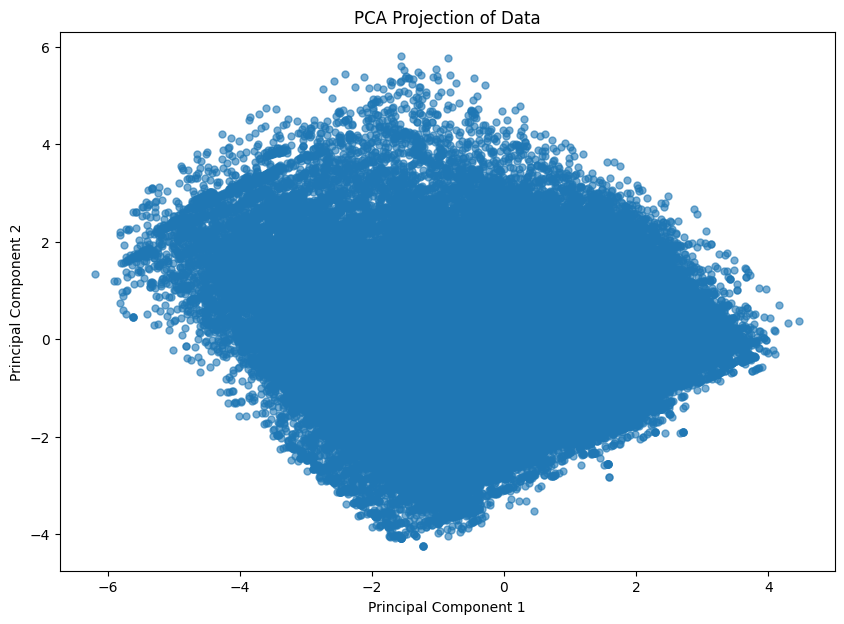

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=25, alpha=0.6)
plt.title("PCA Projection of Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

###### 2) t-SNE

Use t-sne to project the data into 2D and visually inspect for clustering patterns.

In [ ]:
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)

df_tsne = tsne.fit_transform(df_scaled)

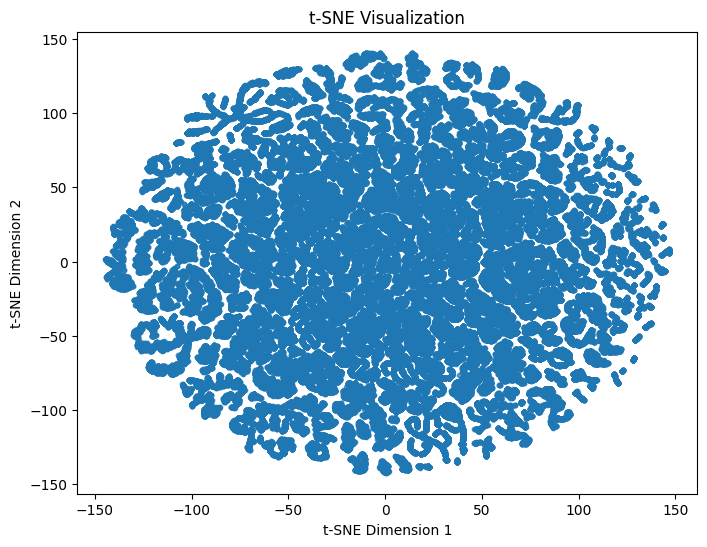

In [ ]:
# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], s=10, alpha=0.7)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [ ]:
# Save data to a pickle file
download_pickle(df_tsne, 'df_tsne.pkl')

###### 3) umap

Use umap to project the data into 2D and visually inspect for clustering patterns.

In [ ]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.0 MB/s eta 0:00:00


In [ ]:
import umap

# Perform umap
umap = umap.UMAP()

components_umap = umap.fit_transform(df_scaled)

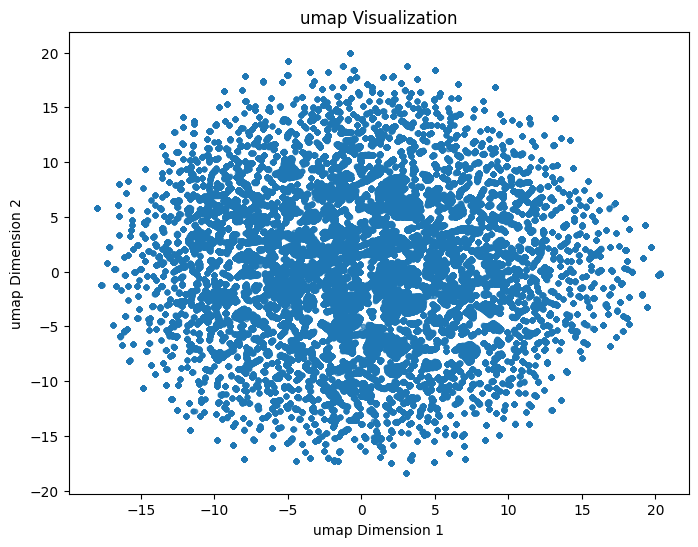

In [ ]:
# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(components_umap[:, 0], components_umap[:, 1], s=10, alpha=0.7)
plt.title('umap Visualization')
plt.xlabel('umap Dimension 1')
plt.ylabel('umap Dimension 2')
plt.show()

In [ ]:
# Save data to a pickle file
download_pickle(components_umap, 'components_umap.pkl')

Data saved successfully as 'components_umap.pkl'.


##### 3) Elbow Method

The elbow method helps you determine the optimal number of clusters (k) for K-means clustering by analyzing the variance explained (inertia) for different values of k. The point where the inertia stops decreasing significantly (forming an "elbow") indicates the optimal number of clusters.

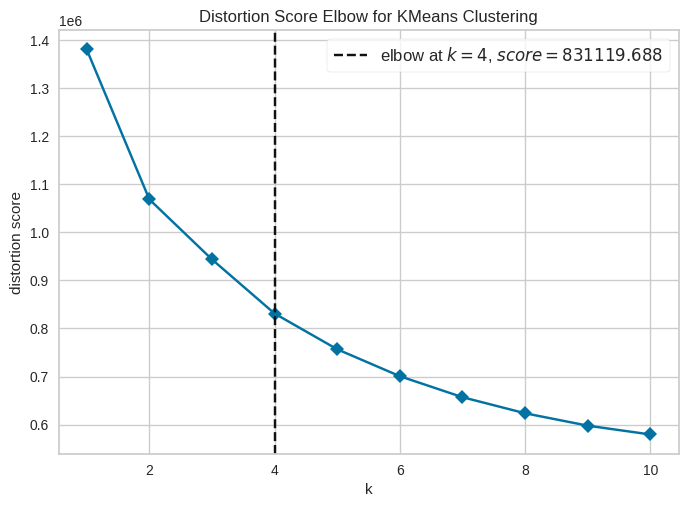

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,11), timings= False)
visualizer.fit(df_scaled)
visualizer.show()
plt.show()

##### 4) silhouette_scores

The silhouette score is a metric that assesses how well data points are clustered together.

**What it measures**

The silhouette score measures how similar a data point is to its own cluster compared to other clusters. It's calculated by comparing the average distance of a data point to other points in its cluster with the average distance to other clusters.




**Why Use Silhouette Score?**
- **Assess Cluster Quality:** A higher score (closer to 1) indicates better-defined clusters.
- **Compare Cluster Configurations:** It can help decide the optimal number of clusters by comparing scores for different values of \( k \).

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize
silhouette_scores = []

# Range of clusters to test
k_range = range(2, 11)

# Compute KMeans for each k and store the inertia
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)  # Use the scaled dataset
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

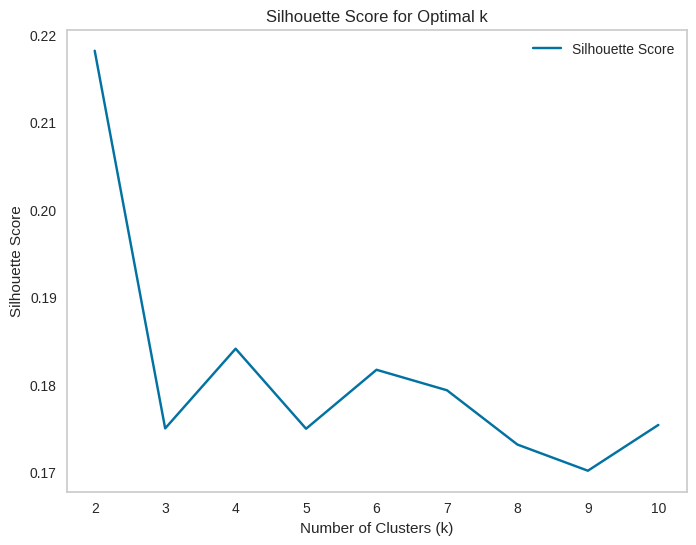

In [ ]:
# Plot the Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='x', label='Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid()
plt.show()

**🔍OBSERVATION🔎**

When we compare the Elbow Method (inertia) and with the k suggested by the highest Silhouette Score, we can conclude that the **optimal k is 4**



---


#### K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans

# Fit the optimal K-Means model (assume optimal k is chosen as 3)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

###### PCA Viz after clustering

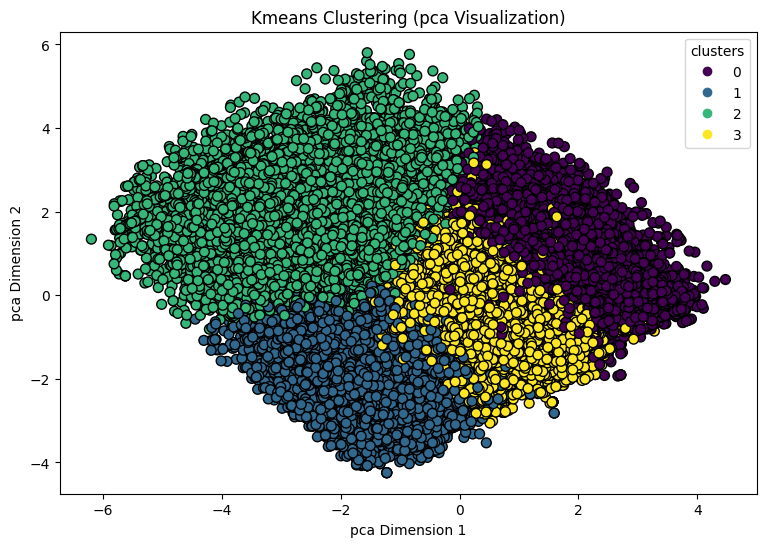

In [ ]:
# Visualize with Legend
fig, ax = plt.subplots(figsize=(9, 6))

# Scatter plot
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1],c=kmeans.labels_, cmap='viridis', edgecolor='k', s=50)
ax.legend(*sc.legend_elements(), title='clusters')

# Titles and labels
ax.set_title('Kmeans Clustering (pca Visualization)')
ax.set_xlabel('pca Dimension 1')
ax.set_ylabel('pca Dimension 2')

# Show plot
plt.show()

###### Post Cluster Analysis

In [ ]:
# Scaled dataframe wth K means labels
df_scaled_kmeans_labels = df_scaled.copy()
df_scaled_kmeans_labels['kmeans_labels'] = kmeans_labels
df_scaled_kmeans_labels.head()

,orgyear,ctc_updated_year,log_ctc,experience_years,designation,class,tier,company_freq_encoded,job_position_freq_encoded,kmeans_labels
0,-0.68,-0.36,1.31,0.68,-1.61,-1.50,-1.52,0.84,1.51,1
1,-0.44,0.37,-1.36,0.44,-0.15,-0.26,-0.35,-0.50,1.51,3
2,1.47,-0.36,0.31,-1.47,-1.61,0.99,0.82,-0.35,0.02,3
3,-2.58,1.10,0.74,2.58,-0.15,-1.50,-1.52,-0.49,0.02,2
4,-1.39,-1.09,1.28,1.39,1.31,-1.50,-1.52,-0.01,0.11,2


In [ ]:
df_scaled_kmeans_labels['kmeans_labels'].value_counts()

,count
kmeans_labels,
3,59867
0,40428
1,28607
2,24541


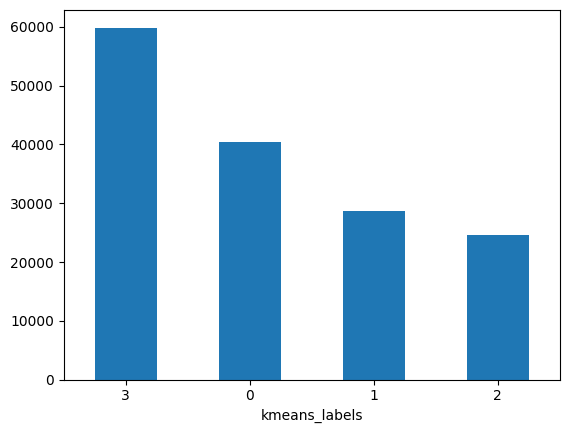

In [ ]:
df_scaled_kmeans_labels['kmeans_labels'].value_counts().plot(kind='bar')
plt.xticks(rotation=360)
plt.show()

**🔍OBSERVATION🔎**

- Cluster 3 (59,867 members): The largest cluster, representing 39.0% of the total population.

- Cluster 0 (40,428 members): The second-largest cluster, representing 26.4% of the total population.

- Cluster 1 (28,607 members): The third-largest cluster, representing 18.7% of the total population.

- Cluster 2 (24,541 members): The smallest cluster, representing 16.0% of the total population.

In [ ]:
polar = df_scaled_kmeans_labels.groupby("kmeans_labels").mean().reset_index()
polar = pd.melt(polar, id_vars=["kmeans_labels"])
polar.head()

,kmeans_labels,variable,value
0,0,orgyear,0.43
1,1,orgyear,0.13
2,2,orgyear,-1.71
3,3,orgyear,0.35
4,0,ctc_updated_year,0.03


In [ ]:
import plotly.express as px

"""
  'polar' : customer dataset we are using
  'r' :  mean values for each feature which will be connected using lines
  'theta' : variables where each of the feature will have an angle and
            color will be based on the label of the clusters.
"""
fig = px.line_polar(polar, r="value", theta="variable", color="kmeans_labels", line_close=True,height=700,width=800)
fig.show()

In [ ]:
# Unencoded and Unscaled dataset with K means labels
df_kmeans_labels = df[['company_hash','orgyear','job_position', 'ctc', 'ctc_updated_year', 'experience_years', 'designation', 'class', 'tier']]
df_kmeans_labels['kmeans_labels'] = kmeans_labels
df_kmeans_labels.head()

,company_hash,orgyear,job_position,ctc,ctc_updated_year,experience_years,designation,class,tier,kmeans_labels
0,bxwqgogen,2012,Backend Engineer,3500000.00,2019,12,1,1,1,1
1,nqsn axsxnvr,2013,Backend Engineer,250000.00,2020,11,2,2,2,3
2,gunhb,2021,FullStack Engineer,1300000.00,2019,3,1,3,3,3
3,bxwqgotbx wgqugqvnxgz,2004,FullStack Engineer,2000000.00,2021,20,2,1,1,2
4,fvrbvqn rvmo,2009,Unknown,3400000.00,2018,15,3,1,1,2


In [ ]:
numerical_agg = df_kmeans_labels.groupby('kmeans_labels').agg({
                                                              'orgyear': ['mean', 'median'],
                                                              'ctc': ['mean', 'median', 'max', 'min'],
                                                              'experience_years': ['mean', 'median']
                                                              }).reset_index()
numerical_agg

kmeans_labels orgyear                ctc                                  \
                   mean  median       mean     median         max      min   
0             0 2016.65 2017.00  795088.19  650000.00  6000000.00 40000.00   
1             1 2015.38 2015.00 3904540.78 2100000.00 28348000.00 55000.00   
2             2 2007.65 2009.00 2360811.35 1800000.00 28348000.00 40000.00   
3             3 2016.31 2016.00  851101.59  740000.00 12000000.00 40000.00   

  experience_years         
              mean median  
0             7.35   7.00  
1             8.62   9.00  
2            16.35  15.00  
3             7.69   8.00

In [ ]:
categorical_agg = df_kmeans_labels.groupby('kmeans_labels').agg({
                                                                'company_hash': lambda x: x.mode()[0],  # Most frequent company
                                                                'job_position': lambda x: x.mode()[0],  # Most frequent job position
                                                                'designation': lambda x: x.mode()[0],
                                                                'class': lambda x: x.mode()[0],
                                                                'tier': lambda x: x.mode()[0]
                                                                }).reset_index()
categorical_agg

,kmeans_labels,company_hash,job_position,designation,class,tier
0,0,nvnv wgzohrnvzwj otqcxwto,Backend Engineer,3,3,3
1,1,vbvkgz,Backend Engineer,1,1,1
2,2,gqvwrt,Engineering Leadership,2,2,1
3,3,zgn vuurxwvmrt vwwghzn,Backend Engineer,2,2,3


In [ ]:
# Merge numerical and categorical summaries
cluster_summary = pd.concat([numerical_agg, categorical_agg], axis=1)
cluster_summary

,"(kmeans_labels, )","(orgyear, mean)","(orgyear, median)","(ctc, mean)","(ctc, median)","(ctc, max)","(ctc, min)","(experience_years, mean)","(experience_years, median)",kmeans_labels,company_hash,job_position,designation,class,tier
0,0,2016.65,2017.00,795088.19,650000.00,6000000.00,40000.00,7.35,7.00,0,nvnv wgzohrnvzwj otqcxwto,Backend Engineer,3,3,3
1,1,2015.38,2015.00,3904540.78,2100000.00,28348000.00,55000.00,8.62,9.00,1,vbvkgz,Backend Engineer,1,1,1
2,2,2007.65,2009.00,2360811.35,1800000.00,28348000.00,40000.00,16.35,15.00,2,gqvwrt,Engineering Leadership,2,2,1
3,3,2016.31,2016.00,851101.59,740000.00,12000000.00,40000.00,7.69,8.00,3,zgn vuurxwvmrt vwwghzn,Backend Engineer,2,2,3


**🔍OBSERVATION🔎**

**Cluster 0:** The second-largest cluster, representing 26.4% of the total population.
- **Average Orgyear**: 2016.65  
- **Median Orgyear**: 2017.00  
- **Average CTC**: ₹795,088.19  
- **Median CTC**: ₹650,000.00  
- **CTC Range**: ₹40,000.00 to ₹6,000,000.00  
- **Average Experience**: 7.35 years  
- **Most Frequent Company**: `nvnv wgzohrnvzwj otqcxwto`  
- **Most Frequent Job Position**: `Backend Engineer`  
- **Designation**: Class 3, Tier 3  

**Observation**:  
This cluster represents relatively newer employees (median orgyear 2017), with moderate CTC levels, primarily in `Backend Engineer` roles. The tier and designation indicate a lower hierarchy in the organization.  

**Business Insight**:  
Cluster 0 could represent entry-level or mid-level backend engineers. Focus on upskilling and mentoring to improve career progression for these employees.



**Cluster 1:** The third-largest cluster, representing 18.7% of the total population.
- **Average Orgyear**: 2015.38  
- **Median Orgyear**: 2015.00  
- **Average CTC**: ₹3,904,540.78  
- **Median CTC**: ₹2,100,000.00  
- **CTC Range**: ₹55,000.00 to ₹28,348,000.00  
- **Average Experience**: 8.62 years  
- **Most Frequent Company**: `vbvkgz`  
- **Most Frequent Job Position**: `Backend Engineer`  
- **Designation**: Class 1, Tier 1  

**Observation**:  
This cluster represents senior employees (median orgyear 2015) with high CTC levels, indicating more experienced and skilled backend engineers.  

**Business Insight**:  
Cluster 1 represents top-performing backend engineers with significant contributions. Retention strategies, including rewards and recognition, are crucial for this group.



**Cluster 2:** The smallest cluster, representing 16.0% of the total population.
- **Average Orgyear**: 2007.65  
- **Median Orgyear**: 2009.00  
- **Average CTC**: ₹2,360,811.35  
- **Median CTC**: ₹1,800,000.00  
- **CTC Range**: ₹40,000.00 to ₹28,348,000.00  
- **Average Experience**: 16.35 years  
- **Most Frequent Company**: `gqvwrt`  
- **Most Frequent Job Position**: `Engineering Leadership`  
- **Designation**: Class 2, Tier 1  

**Observation**:  
This cluster represents highly experienced employees (median experience 15 years) in leadership roles, earning competitive CTCs.  

**Business Insight**:  
Cluster 2 represents leadership roles essential for organizational strategy and vision. Leadership development programs and succession planning are critical for this group.



**Cluster 3:** The largest cluster, representing 39.0% of the total population.
- **Average Orgyear**: 2016.31  
- **Median Orgyear**: 2016.00  
- **Average CTC**: ₹851,101.59  
- **Median CTC**: ₹740,000.00  
- **CTC Range**: ₹40,000.00 to ₹12,000,000.00  
- **Average Experience**: 7.69 years  
- **Most Frequent Company**: `zgn vuurxwvmrt vwwghzn`  
- **Most Frequent Job Position**: `Backend Engineer`  
- **Designation**: Class 2, Tier 3  

**Observation**:  
This cluster represents moderately experienced employees (median experience 8 years) with lower-tier designations and compensation.  

**Business Insight**:  
Cluster 3 may represent a mix of underutilized talent or employees in stagnant roles. Career development plans and better role alignment can enhance productivity and job satisfaction.



**General Insights:**
1. **CTC Trends**: Higher clusters (e.g., Cluster 1) represent experienced and top-performing employees, while lower clusters (e.g., Cluster 0) highlight entry-level roles.
2. **Role-Specific Clusters**: `Backend Engineer` dominates multiple clusters, requiring tailored strategies for employee retention and skill enhancement.
3. **Leadership Representation**: Cluster 2 highlights a clear leadership focus, showing the importance of experience in determining cluster characteristics.

By leveraging these insights, the organization can design targeted strategies for employee development, retention, and optimization of talent management policies.



---


#### Hierarchical Clustering

##### Agglomerative Clustering using scipy

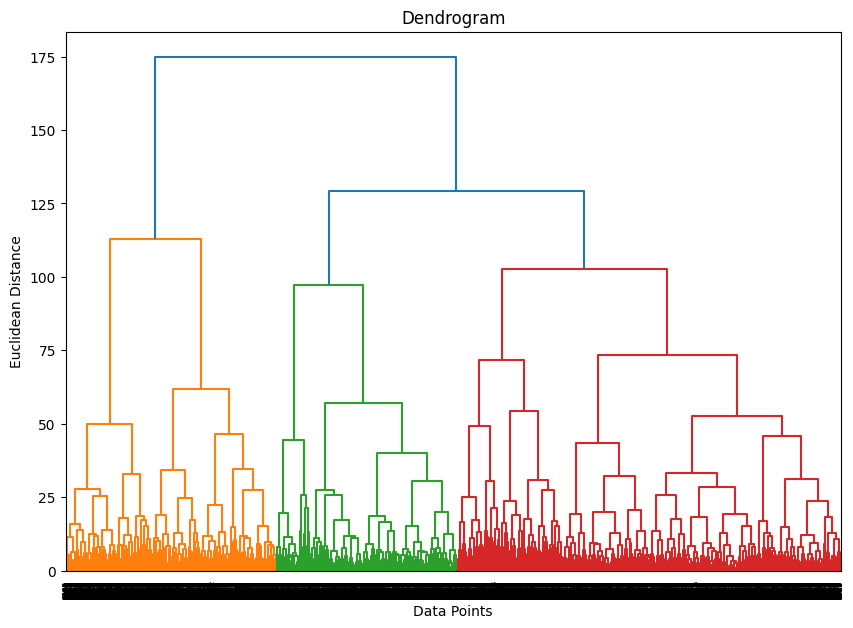

In [ ]:
import scipy.cluster.hierarchy as sch

# Sample a subset of the data
df_scaled_sampled = df_scaled.sample(n=10000, random_state=0)

# Generate the linkage matrix
linkage_matrix = sch.linkage(df_scaled_sampled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

**🔍OBSERVATION🔎**

- The dendrogram, based on a subset of 10,000 data points, visually shows three distinct clusters indicated by three separate colors. These clusters represent hierarchical relationships within the sampled dataset.

- The hierarchical method merges similar data points based on linkage distance, which might result in broader cluster groupings compared to the finer distinctions made by K-Means. This could imply that two K-Means clusters are highly similar and merged into one in the dendrogram.

- The dendrogram suggests three broad categories of learners based on features like experience, job role, and CTC. If using this clustering approach, you might consider analyzing the three clusters to identify broad trends. However, **K-Means may offer finer-grained segmentation better suited for the specific business use case.**

**Business Insight:**

"Hierarchical clustering provides an alternative perspective on data segmentation, suggesting three broad clusters. This difference highlights the importance of choosing the right clustering method based on the business need—either broader trends (hierarchical) or detailed segmentation (K-Means)."


---
## **Answers to the Questions**

**1. What percentage of users fall into the largest cluster?**

 Approximately 39.02% of learners belong to the largest cluster.

**2. Comment on the characteristics that differentiate the primary clusters from each other.**

- **Cluster 0:** Learners with moderate experience (mean: 7 years), average CTC, and backend engineering roles dominate.
- **Cluster 1:** Highly experienced learners (mean: 8.6 years) with significantly higher CTC; backend engineers dominate.
- **Cluster 2:** Senior leadership roles with extensive experience (mean: 16.3 years) and very high CTC.
- **Cluster 3:** Entry to mid-level learners with moderate experience (mean: 7.6 years) and lower average CTC.


**3. Is it always true that with an increase in years of experience, the CTC increases? Provide a case where this isn't true.**

- While there is a general trend of higher CTC with increased experience, exceptions exist.  
  - Example: Some learners in **Cluster 3** with 8 years of experience have a lower CTC compared to learners in **Cluster 1** with 7 years.



**4. Name a job position that is commonly considered entry-level but has a few learners with unusually high CTCs in the dataset.**

- Backend Engineer is considered an entry-level position, but some learners in this role have very high CTCs (e.g., over ₹28,348,000).  


**5. What is the average CTC of learners across different job positions?**




In [ ]:
# Average CTC of learners across different job positions
positions = ['Backend Engineer', 'FullStack Engineer', 'Frontend Engineer', 'Engineering Leadership', 'QA Engineer', 'Android Engineer', 'Data Scientist', 'Devops Engineer']
print("Average CTC of learners across different job positions:")
print("-"*55)
for elem in positions:
  print(f"{elem}: {round(df_kmeans_labels[df_kmeans_labels['job_position'] == elem]['ctc'].mean(),2)}")

Average CTC of learners across different job positions:
-------------------------------------------------------
Backend Engineer: 1695907.87
FullStack Engineer: 1417197.35
Frontend Engineer: 1328699.31
Engineering Leadership: 3087201.14
QA Engineer: 1244316.18
Android Engineer: 1293596.82
Data Scientist: 1660851.34
Devops Engineer: 1373957.19


**6. For a given company(nvnv wgzohrnvzwj otqcxwto), how does the average CTC of a Data Scientist compare with other roles?**

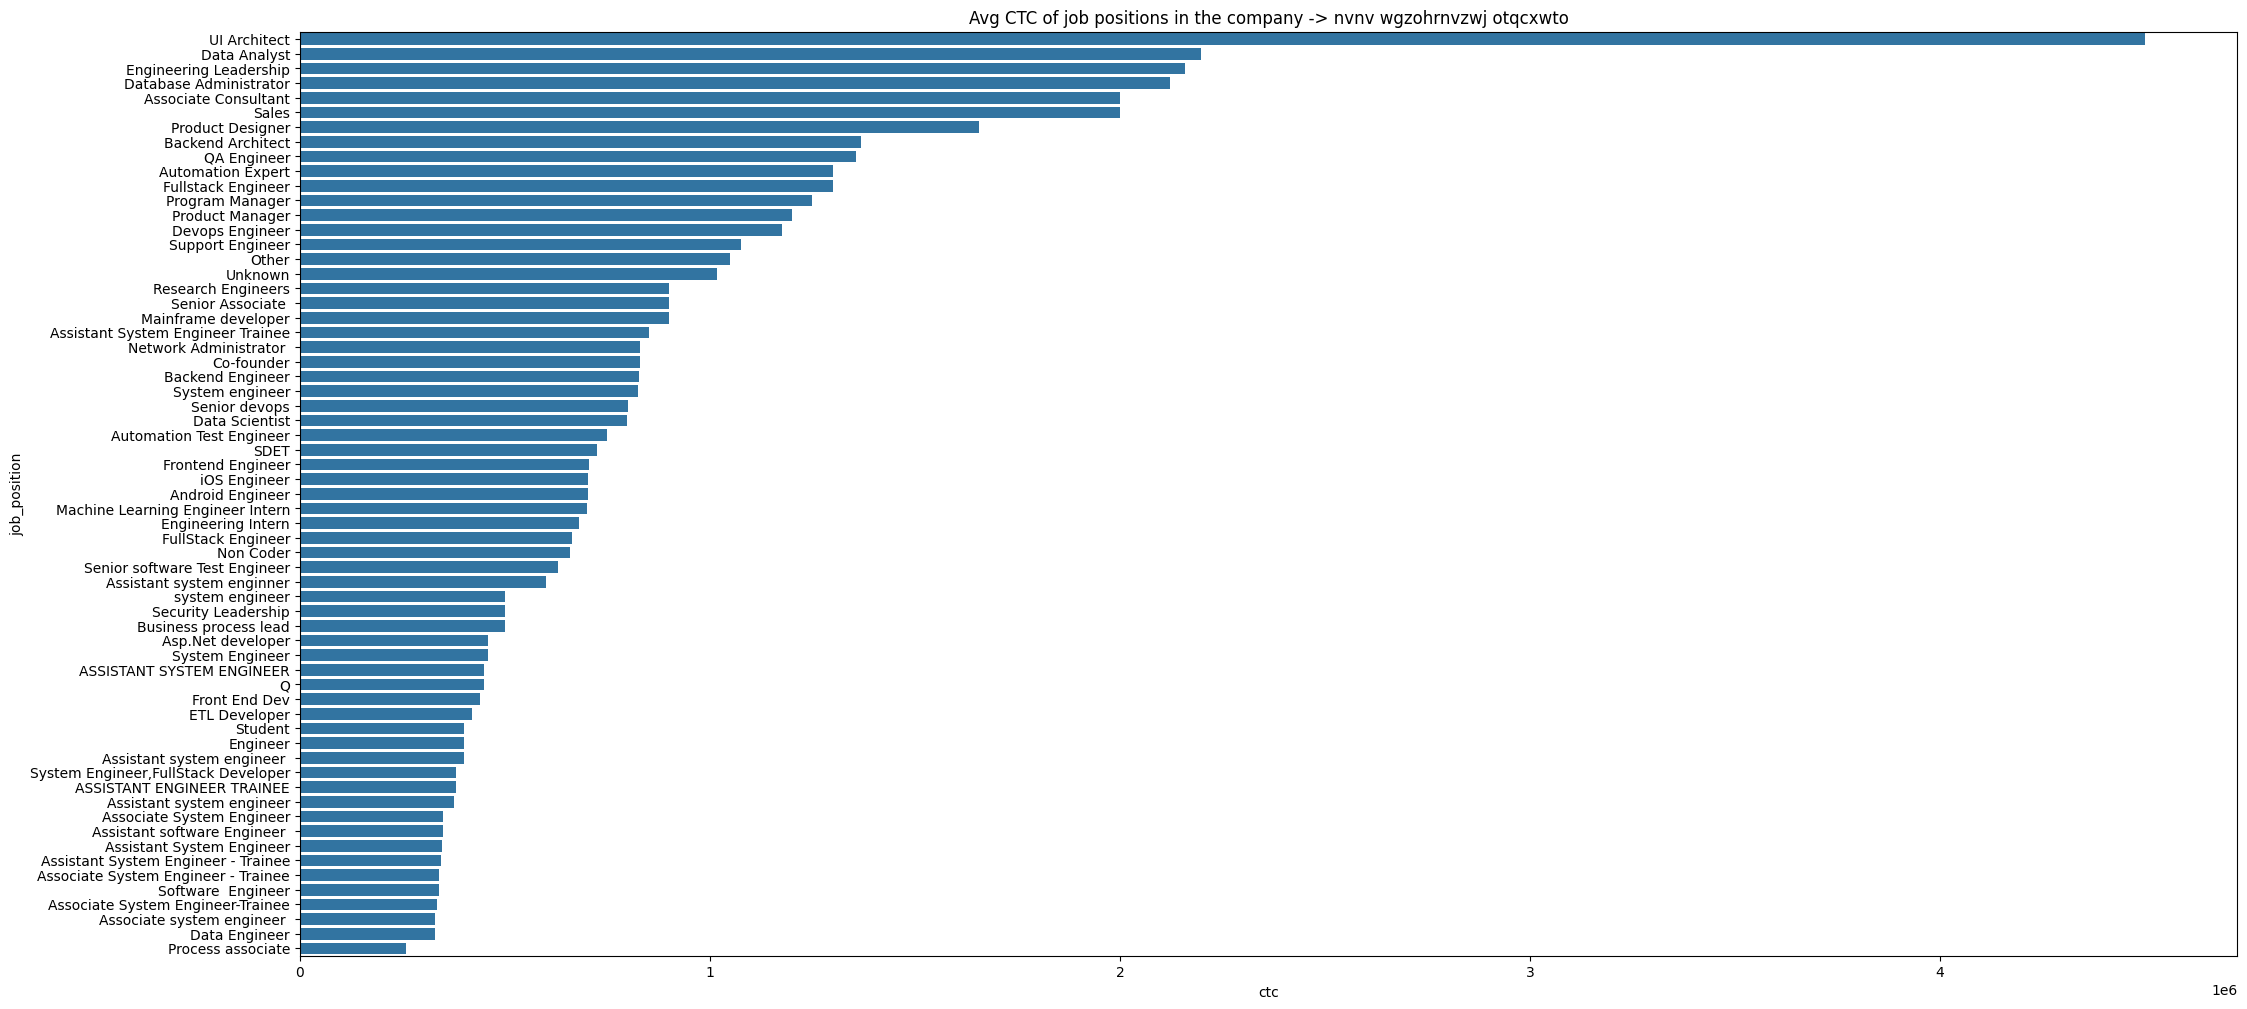

In [ ]:
specific_company = df_kmeans_labels[df_kmeans_labels['company_hash'] == 'nvnv wgzohrnvzwj otqcxwto']
specific_job_positions = specific_company.groupby('job_position')['ctc'].mean().reset_index()
specific_job_positions.sort_values(by=['ctc'], ascending=False, inplace=True)
plt.figure(figsize=(25, 12))
sns.barplot(data=specific_job_positions,  x='ctc', y='job_position')
plt.title('Avg CTC of job positions in the company -> nvnv wgzohrnvzwj otqcxwto')
plt.show()

- For the company(nvnv wgzohrnvzwj otqcxwto) the avarage CTC of "Data Scientist" is moderate when compared to the other roles.

**7. Distribution of learners based on the Tier flag:**



1. **Which companies dominate in Tier 1 and why might this be the case?**  

In [ ]:
df_kmeans_labels[df_kmeans_labels['tier'] == 1]['company_hash'].value_counts().nlargest(3)

,count
company_hash,
vbvkgz,885
gqvwrt,636
nvnv wgzohrnvzwj otqcxwto,614



   - Companies with high-paying roles and strong market presence dominate Tier 1 (e.g., **"vbvkgz"**).  
   - These companies are known for rewarding specialized and senior roles.

2. **Notable patterns for Tier 3 learners:**  


In [ ]:
df_kmeans_labels[df_kmeans_labels['tier'] == 3].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
company_hash,85656,8525,nvnv wgzohrnvzwj otqcxwto,4718,NaN,NaN,NaN,NaN,NaN,NaN,NaN
orgyear,85656.00,NaN,NaN,NaN,2015.89,3.35,2000.00,2014.00,2016.00,2018.00,2021.00
job_position,85656,487,Backend Engineer,23420,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ctc,85656.00,NaN,NaN,NaN,896741.04,597655.52,40000.00,480000.00,750000.00,1200000.00,17000000.00
ctc_updated_year,85656.00,NaN,NaN,NaN,2019.49,1.43,2015.00,2019.00,2020.00,2021.00,2021.00
experience_years,85656.00,NaN,NaN,NaN,8.11,3.35,3.00,6.00,8.00,10.00,24.00
designation,85656.00,NaN,NaN,NaN,2.32,0.73,1.00,2.00,2.00,3.00,3.00
class,85656.00,NaN,NaN,NaN,2.63,0.68,1.00,2.00,3.00,3.00,3.00
tier,85656.00,NaN,NaN,NaN,3.00,0.00,3.00,3.00,3.00,3.00,3.00
kmeans_labels,85656.00,NaN,NaN,NaN,1.51,1.45,0.00,0.00,2.00,3.00,3.00


- The majority of learners in Tier 3 are associated with relatively lower-paying job positions, such as Backend Engineer (most frequent job position with 23,420 occurrences) and have a median CTC of ₹750,000, significantly lower than higher tiers. Additionally, Tier 3 learners tend to have mid-range experience levels (median of 8 years) and are generally clustered in companies with less competitive compensation structures.


**8. After performing unsupervised clustering:**

1. **How many clusters have been identified using the Elbow method?**  
   - The Elbow method suggests **4 clusters** as the optimal number.

2. **Do the clusters align with manual clustering efforts?**  
   - The clusters align moderately with manual efforts but differ in granularity. For instance:  
     - K-Means clusters emphasize experience and CTC.  
     - Manual clustering emphasizes job roles and tiers.  

---
## **Business Insights and Recommendations🤝**
---

**Insights**

1. **Compensation Disparity Across Tiers:**
   - Learners in Tier 1 earn significantly higher CTCs compared to their Tier 3 counterparts, with Tier 3 learners showing a median CTC of ₹750,000 despite moderate experience levels (median of 8 years).  

2. **Experience-CTC Misalignment:**
   - While CTC generally increases with experience, anomalies exist. Some highly experienced learners (>15 years) earn low salaries, whereas some entry-level Backend Engineers receive unusually high CTCs due to niche skills or market demand.

3. **Job Position-Specific CTC Trends:**
   - Engineering Leadership roles command the highest average CTC (~₹3.1 million), followed by Backend Engineers (~₹1.7 million) and Data Scientists (~₹1.6 million). QA Engineers and Frontend Engineers have lower average CTCs (~₹1.2–1.3 million).

4. **Company-Specific CTC Variability:**
   - Certain companies offer significantly higher CTCs than others for similar roles and experience levels, indicating uneven compensation practices across organizations.

5. **Cluster-Based Learner Segments:**
   - Clustering reveals distinct learner profiles:
     - High earners in Tier 1 companies with significant experience (Cluster 1).
     - Mid-level earners in Tier 2 companies with 8–10 years of experience (Cluster 2).
     - Low earners in Tier 3 companies despite moderate experience levels (Cluster 3).



**Recommendations**

1. **For Tier 3 Learners:**
   - Develop targeted upskilling programs focusing on high-demand job roles and premium-paying skills.
   - Partner with premium companies to create mentorship programs that facilitate transition to Tier 1 roles.

2. **For Companies with Anomalous Compensation Practices:**
   - Encourage re-evaluation of compensation structures to align with industry standards, especially for senior roles.
   - Use data-driven insights to negotiate better salary packages for learners.

3. **For Entry-Level Learners:**
   - Offer certifications and courses in niche technologies and tools that justify high market demand and higher CTCs.

4. **Role-Specific Curriculum Enhancement:**
   - Focus on leadership and strategic management courses for learners targeting Engineering Leadership roles.
   - Update QA and Frontend Engineer curricula to include advanced tools and technologies to increase earning potential.

5. **Cluster-Specific Career Guidance:**
   - Provide personalized career counseling for learners based on cluster characteristics.
   - Focus on career advancement and strategic transitions for low-earning clusters to improve their career trajectories.



---


---








**By**

**SANKARAN MEENAKSHI SUNDARAM**

MS in Computer Science: Artificial Intelligence and Machine Learning

Scaler neovarsity, a constituent member college of woolf